In [347]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="ticks")

import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
import catboost


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin



from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(transform_output="pandas")

In [348]:

plt.style.use(['ggplot', 'seaborn-darkgrid'])


plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] = '--'

/var/folders/g1/stdtphmx6j36mvd7gc84dx3w0000gn/T/ipykernel_2025/2480058980.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-darkgrid'])


Questions to answer

1. Which factors contribute most to the number of bicycles being checkout over the course of a given day?
2.How much impact doeas weather have on demand?
3. How does the behaviour of casual users differ from subscribers?

In [349]:
df=pd.read_csv('data/train.csv', parse_dates=True)
df

datetime  season  holiday  workingday  weather   temp   
0      2011-01-01 00:00:00       1        0           0        1   9.84  \
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [350]:
df.describe()

season       holiday    workingday       weather         temp   
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000  \
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered   
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  \
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [352]:
df_corr = df.drop("datetime", axis=1)

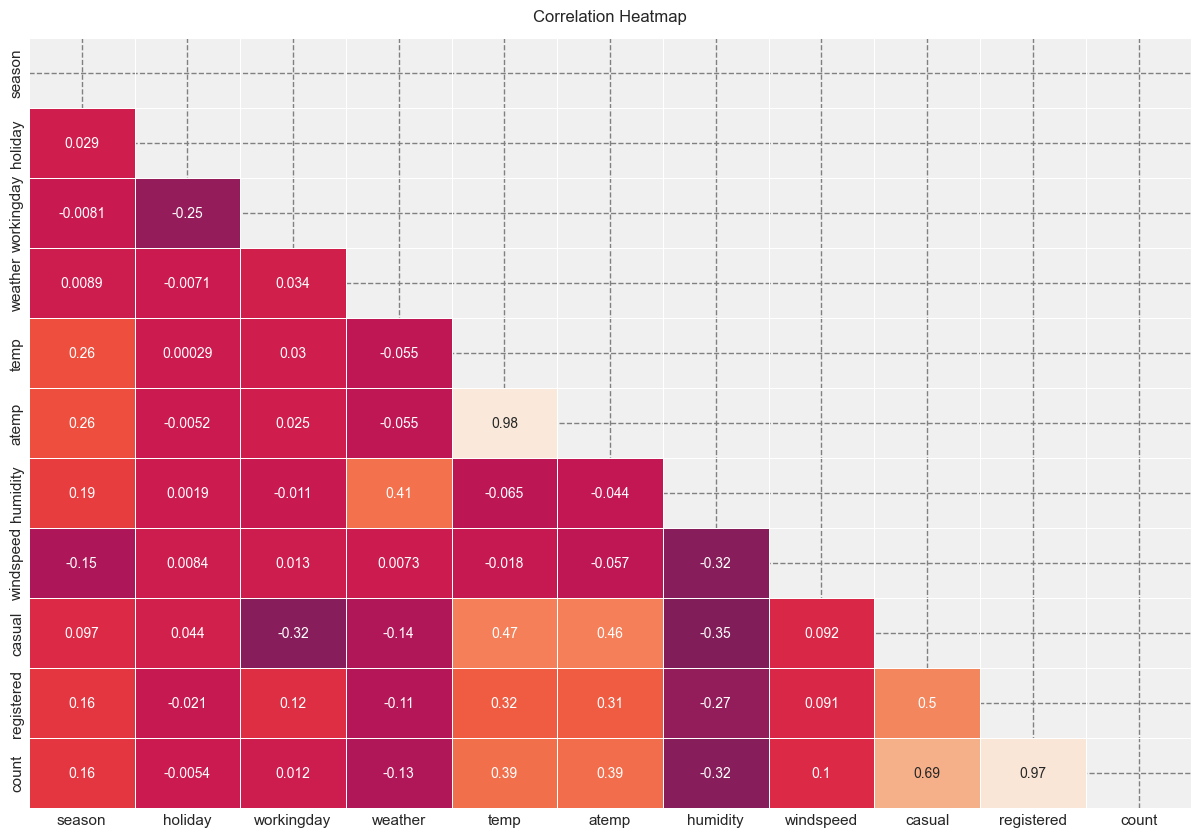

In [353]:
plt.figure(figsize = (15,10))

mask=np.triu(np.ones_like(df_corr.corr(), dtype=bool))

heatmap=sns.heatmap(df_corr.corr(), annot = True, cbar=False, vmin=-1, vmax=1, mask=mask, linewidth=.5)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#look at numerical features (correlation)
num=df[[ 'temp', 'atemp', 'humidity', 'windspeed', 'count']]

sns.pairplot(num, diag_kind='kde')
plt.show()

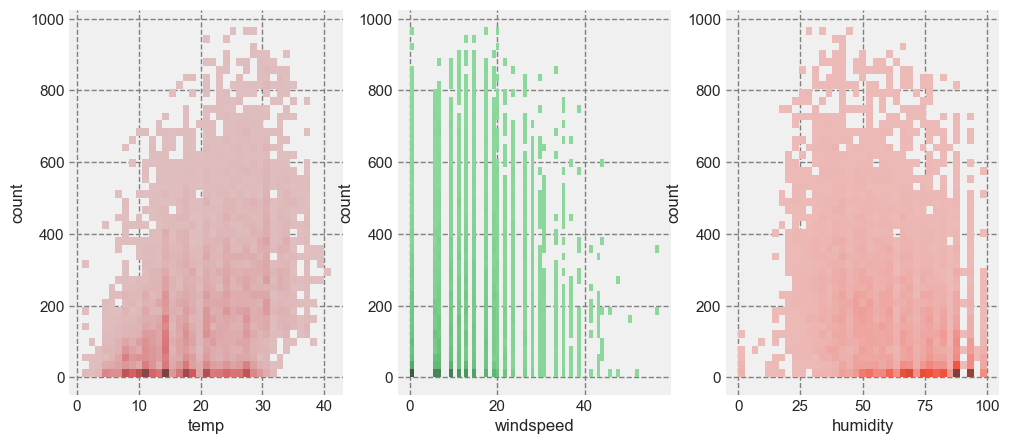

In [355]:
#closer look at main numerical features
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.histplot(x="temp", y="count", data=df,ax=ax1,color='r')
sns.histplot(x="windspeed", y="count", data=df,ax=ax2, color='g')
sns.histplot(x="humidity", y="count", data=df,ax=ax3);

<Axes: >

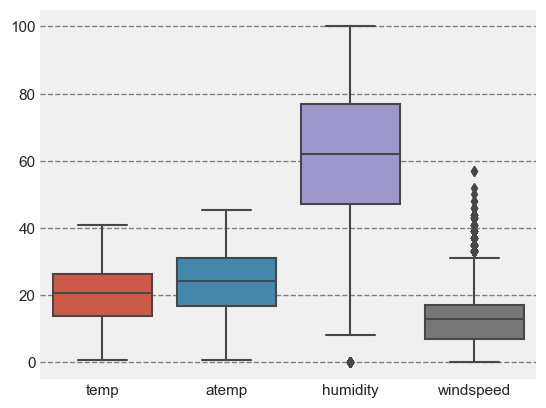

In [356]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed']])

In [357]:

def extract_day_time_fe(df: pd.DataFrame, datetime: str) -> pd.DataFrame:
    
    df["datetime"] = pd.to_datetime(df["datetime"])
  
    df[f"{datetime}_year"] = df[datetime].dt.year
    df[f"{datetime}_hour"] = df[datetime].dt.hour
    df[f"{datetime}_month"] = df[datetime].dt.month
    df[f"{datetime}_month_name"] = df[datetime].dt.month_name()
    df[f"{datetime}_day"] = df[datetime].dt.day
    df[f"{datetime}_day_name"] = df[datetime].dt.day_name()
 
    return df

In [358]:
df

datetime  season  holiday  workingday  weather   temp   
0      2011-01-01 00:00:00       1        0           0        1   9.84  \
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [359]:
df = extract_day_time_fe(df, "datetime")

In [360]:
df.set_index(["datetime"], inplace = True)

In [361]:
df.rename(columns={'count':'total'},inplace=True)

In [362]:
df

season  holiday  workingday  weather   temp   atemp   
datetime                                                                   
2011-01-01 00:00:00       1        0           0        1   9.84  14.395  \
2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
...                     ...      ...         ...      ...    ...     ...   
2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
2012-12-19 21:00:00       4        0           1        1  13.94  15.910   
2012-12-19 22:00:00       4        0           1        1  13.94  17.425   
2012-12-19 23:00:00       4        0           1        1  13.12  16.665   

                     humidity  windspeed  casual  registered  total   
datetime                                                              
2011-01-01 00:00:00        81     0.0000       3          13     16  \
2011-01-01 01:00:00        80     0.0000       8          32     40   
2011-01-01 02:00:00        80     0.0000       5          27     32   
2011-01-01 03:00:00        75     0.0000       3          10     13   
2011-01-01 04:00:00        75     0.0000       0           1      1   
...                       ...        ...     ...         ...    ...   
2012-12-19 19:00:00        50    26.0027       7         329    336   
2012-12-19 20:00:00        57    15.0013      10         231    241   
2012-12-19 21:00:00        61    15.0013       4         164    168   
2012-12-19 22:00:00        61     6.0032      12         117    129   
2012-12-19 23:00:00        66     8.9981       4          84     88   

                     datetime_year  datetime_hour  datetime_month   
datetime                                                            
2011-01-01 00:00:00           2011              0               1  \
2011-01-01 01:00:00           2011              1               1   
2011-01-01 02:00:00           2011              2               1   
2011-01-01 03:00:00           2011              3               1   
2011-01-01 04:00:00           2011              4               1   
...                            ...            ...             ...   
2012-12-19 19:00:00           2012             19              12   
2012-12-19 20:00:00           2012             20              12   
2012-12-19 21:00:00           2012             21              12   
2012-12-19 22:00:00           2012             22              12   
2012-12-19 23:00:00           2012             23              12   

                    datetime_month_name  datetime_day datetime_day_name  
datetime                                                                 
2011-01-01 00:00:00             January             1          Saturday  
2011-01-01 01:00:00             January             1          Saturday  
2011-01-01 02:00:00             January             1          Saturday  
2011-01-01 03:00:00             January             1          Saturday  
2011-01-01 04:00:00             January             1          Saturday  
...                                 ...           ...               ...  
2012-12-19 19:00:00            December            19         Wednesday  
2012-12-19 20:00:00            December            19         Wednesday  
2012-12-19 21:00:00            December            19         Wednesday  
2012-12-19 22:00:00            December            19         Wednesday  
2012-12-19 23:00:00            December            19         Wednesday  

[10886 rows x 17 columns]

In [363]:
#Examine whether the bicycle count shows any time-related patterns.
#Extract features like hour, month etc. from the datetime column.
#Plot small sections of the data (1 day, 1 week etc.)
#Group by a time feature and observe grouped means

In [364]:
df.isnull().any()

season                 False
holiday                False
workingday             False
weather                False
temp                   False
atemp                  False
humidity               False
windspeed              False
casual                 False
registered             False
total                  False
datetime_year          False
datetime_hour          False
datetime_month         False
datetime_month_name    False
datetime_day           False
datetime_day_name      False
dtype: bool

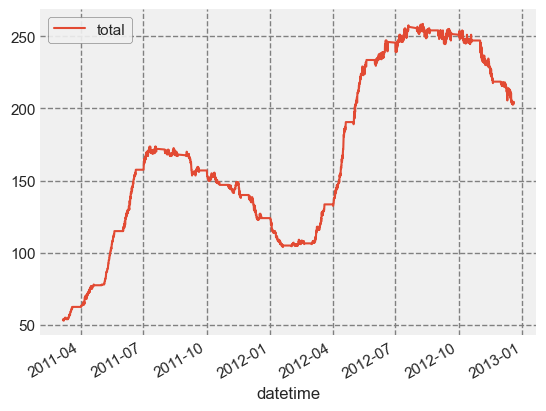

In [365]:
df.rolling(1000)["total"].median().plot(y='total')
legend = plt.legend(frameon=True, loc="upper left", fancybox=True, edgecolor='gray')
legend.get_frame().set_alpha(0.9)
sns.despine()

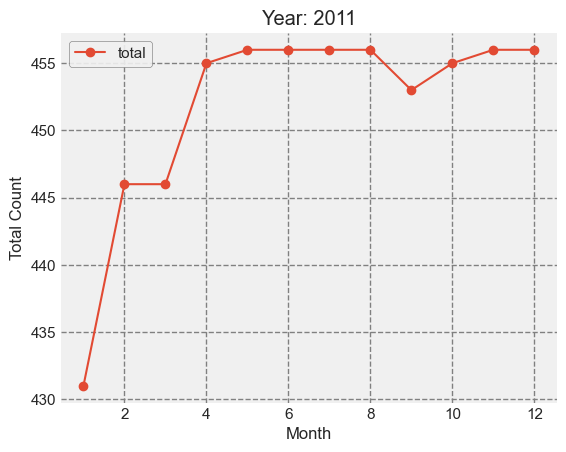

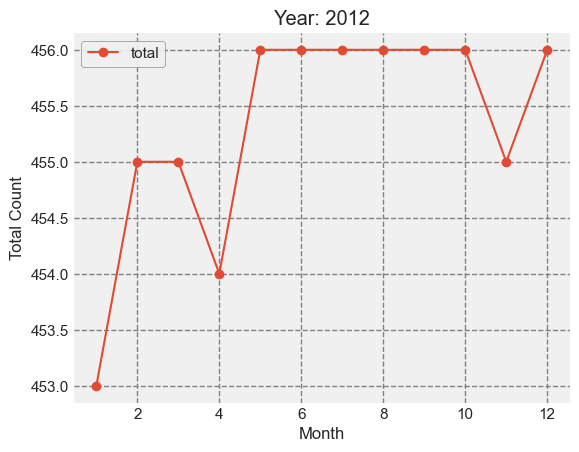

In [366]:
years = df['datetime_year'].unique()
for year in years:
    # Filter the DataFrame for the specific year
    df_year = df[df['datetime_year'] == year]
    
    # Group by month, count the occurrences, and unstack
    df_plot = df_year.groupby('datetime_month')['total'].size()
    
    # Plot the data
    df_plot.plot(kind='line', marker='o', title=f"Year: {year}")
    plt.xlabel("Month")
    plt.ylabel("Total Count")
   
    legend = plt.legend(frameon=True, loc="upper left", fancybox=True, edgecolor='gray')
    legend.get_frame().set_alpha(0.9)
    sns.despine()
    plt.show()

In [367]:
df.reset_index(inplace=True)

In [368]:
df

datetime  season  holiday  workingday  weather   temp   
0     2011-01-01 00:00:00       1        0           0        1   9.84  \
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  total  datetime_year   
0      14.395        81     0.0000       3          13     16           2011  \
1      13.635        80     0.0000       8          32     40           2011   
2      13.635        80     0.0000       5          27     32           2011   
3      14.395        75     0.0000       3          10     13           2011   
4      14.395        75     0.0000       0           1      1           2011   
...       ...       ...        ...     ...         ...    ...            ...   
10881  19.695        50    26.0027       7         329    336           2012   
10882  17.425        57    15.0013      10         231    241           2012   
10883  15.910        61    15.0013       4         164    168           2012   
10884  17.425        61     6.0032      12         117    129           2012   
10885  16.665        66     8.9981       4          84     88           2012   

       datetime_hour  datetime_month datetime_month_name  datetime_day   
0                  0               1             January             1  \
1                  1               1             January             1   
2                  2               1             January             1   
3                  3               1             January             1   
4                  4               1             January             1   
...              ...             ...                 ...           ...   
10881             19              12            December            19   
10882             20              12            December            19   
10883             21              12            December            19   
10884             22              12            December            19   
10885             23              12            December            19   

      datetime_day_name  
0              Saturday  
1              Saturday  
2              Saturday  
3              Saturday  
4              Saturday  
...                 ...  
10881         Wednesday  
10882         Wednesday  
10883         Wednesday  
10884         Wednesday  
10885         Wednesday  

[10886 rows x 18 columns]

In [369]:
df.groupby('datetime_month')["total"].size()

datetime_month
1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: total, dtype: int64

In [370]:
df_year

season  holiday  workingday  weather   temp   atemp   
datetime                                                                   
2012-01-01 00:00:00       1        0           0        1  14.76  18.940  \
2012-01-01 01:00:00       1        0           0        1  14.76  17.425   
2012-01-01 02:00:00       1        0           0        1  13.12  17.425   
2012-01-01 03:00:00       1        0           0        1  12.30  16.665   
2012-01-01 04:00:00       1        0           0        1  11.48  15.150   
...                     ...      ...         ...      ...    ...     ...   
2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
2012-12-19 21:00:00       4        0           1        1  13.94  15.910   
2012-12-19 22:00:00       4        0           1        1  13.94  17.425   
2012-12-19 23:00:00       4        0           1        1  13.12  16.665   

                     humidity  windspeed  casual  registered  total   
datetime                                                              
2012-01-01 00:00:00        66     0.0000       5          43     48  \
2012-01-01 01:00:00        66     8.9981      15          78     93   
2012-01-01 02:00:00        76     0.0000      16          59     75   
2012-01-01 03:00:00        81     0.0000      11          41     52   
2012-01-01 04:00:00        81     6.0032       0           8      8   
...                       ...        ...     ...         ...    ...   
2012-12-19 19:00:00        50    26.0027       7         329    336   
2012-12-19 20:00:00        57    15.0013      10         231    241   
2012-12-19 21:00:00        61    15.0013       4         164    168   
2012-12-19 22:00:00        61     6.0032      12         117    129   
2012-12-19 23:00:00        66     8.9981       4          84     88   

                     datetime_year  datetime_hour  datetime_month   
datetime                                                            
2012-01-01 00:00:00           2012              0               1  \
2012-01-01 01:00:00           2012              1               1   
2012-01-01 02:00:00           2012              2               1   
2012-01-01 03:00:00           2012              3               1   
2012-01-01 04:00:00           2012              4               1   
...                            ...            ...             ...   
2012-12-19 19:00:00           2012             19              12   
2012-12-19 20:00:00           2012             20              12   
2012-12-19 21:00:00           2012             21              12   
2012-12-19 22:00:00           2012             22              12   
2012-12-19 23:00:00           2012             23              12   

                    datetime_month_name  datetime_day datetime_day_name  
datetime                                                                 
2012-01-01 00:00:00             January             1            Sunday  
2012-01-01 01:00:00             January             1            Sunday  
2012-01-01 02:00:00             January             1            Sunday  
2012-01-01 03:00:00             January             1            Sunday  
2012-01-01 04:00:00             January             1            Sunday  
...                                 ...           ...               ...  
2012-12-19 19:00:00            December            19         Wednesday  
2012-12-19 20:00:00            December            19         Wednesday  
2012-12-19 21:00:00            December            19         Wednesday  
2012-12-19 22:00:00            December            19         Wednesday  
2012-12-19 23:00:00            December            19         Wednesday  

[5464 rows x 17 columns]

In [371]:
##b 2. How do Holidays affect Bike Sharing Demand?

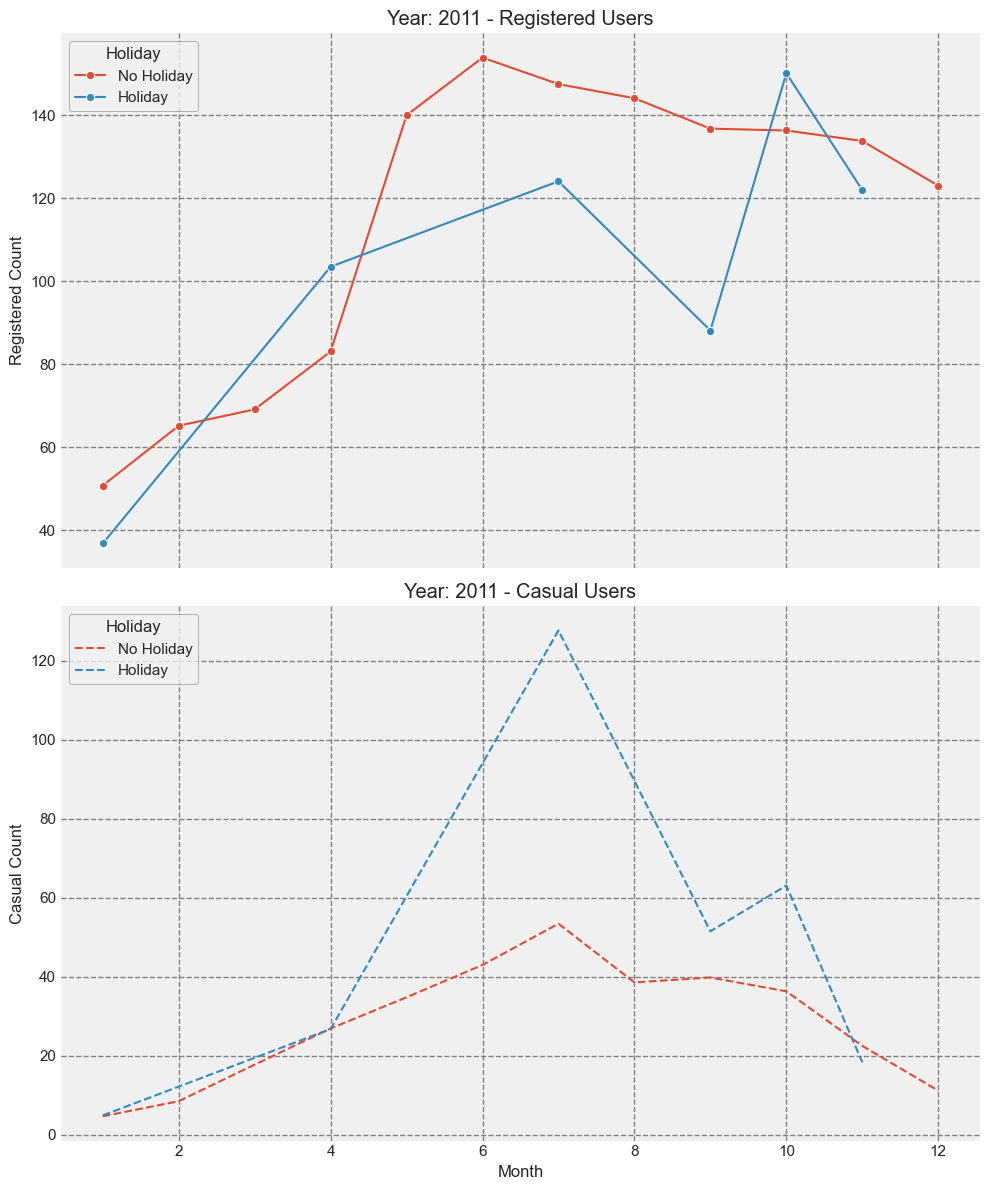

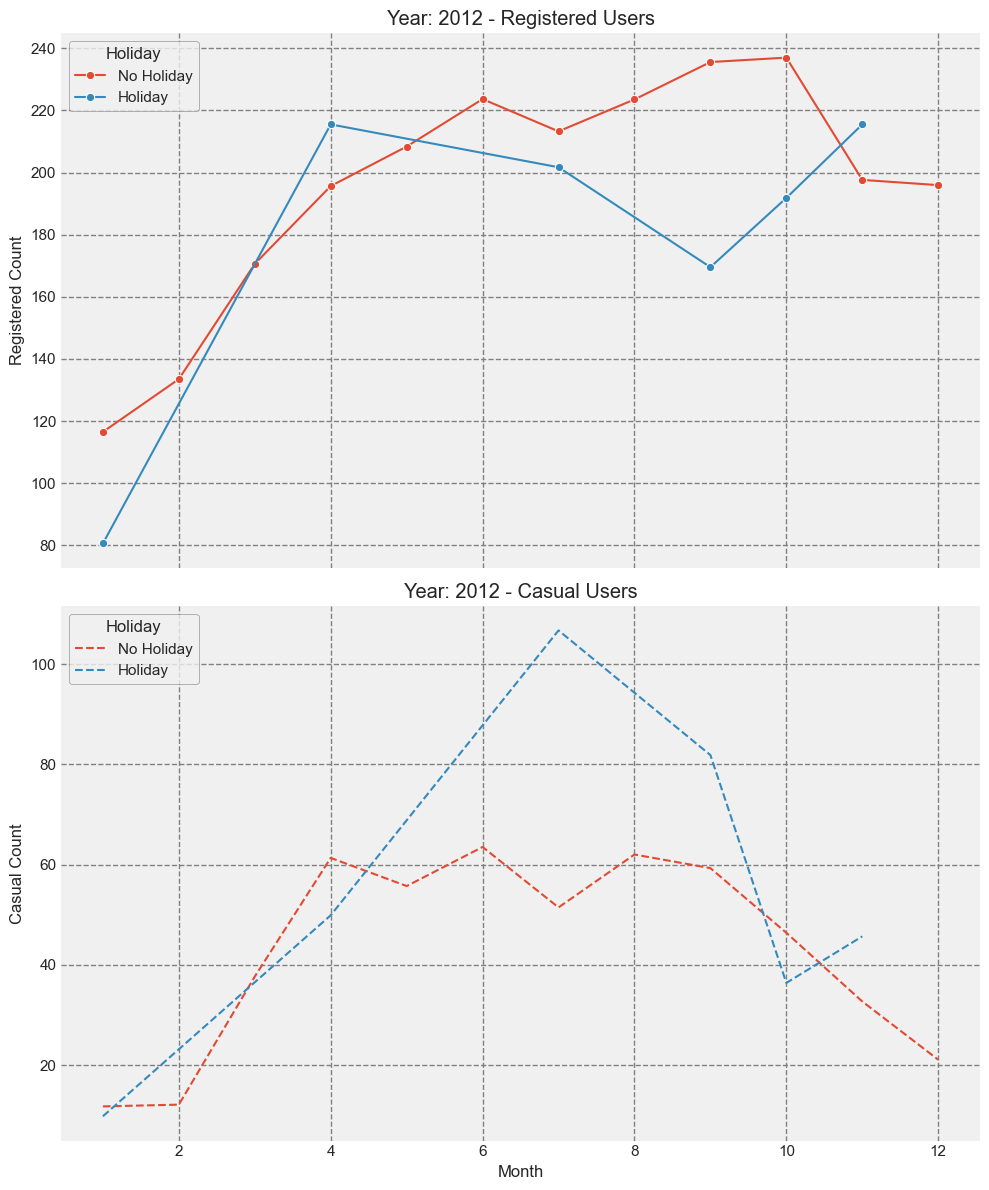

In [372]:
years = df['datetime_year'].unique()
for year in years:
    # Filter the DataFrame for the specific year
    df_year = df[df['datetime_year'] == year]
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
    
   # Plot 'registered' with holiday as hue

    sns.lineplot(x="datetime_month", y="registered", data=df_year, hue="holiday", ax=axes[0], marker='o', label="Registered",errorbar=None)
    axes[0].set_title(f"Year: {year} - Registered Users")
    axes[0].set_ylabel("Registered Count")
    axes[0].legend(frameon=True,title="Holiday", loc="upper left", labels=["No Holiday", "Holiday"],fancybox=True, edgecolor='gray',)  
    
    # Plot 'casual' with holiday as hue, on the same axis
    sns.lineplot(x="datetime_month", y="casual", data=df_year, hue="holiday", ax=axes[1], linestyle='--', label="Casual", errorbar=None)
    axes[1].set_title(f"Year: {year} - Casual Users")
    axes[1].set_xlabel("Month", fontsize=12)
    axes[1].set_ylabel("Casual Count")
    axes[1].legend(frameon=True,title="Holiday", loc="upper left", labels=["No Holiday", "Holiday"], fancybox=True, edgecolor='gray')  
    


     # Remove the top and right spines for a cleaner look
    sns.despine()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    


In [373]:
## Plot for 2011 and 2012

<Axes: xlabel='datetime_hour', ylabel='total'>

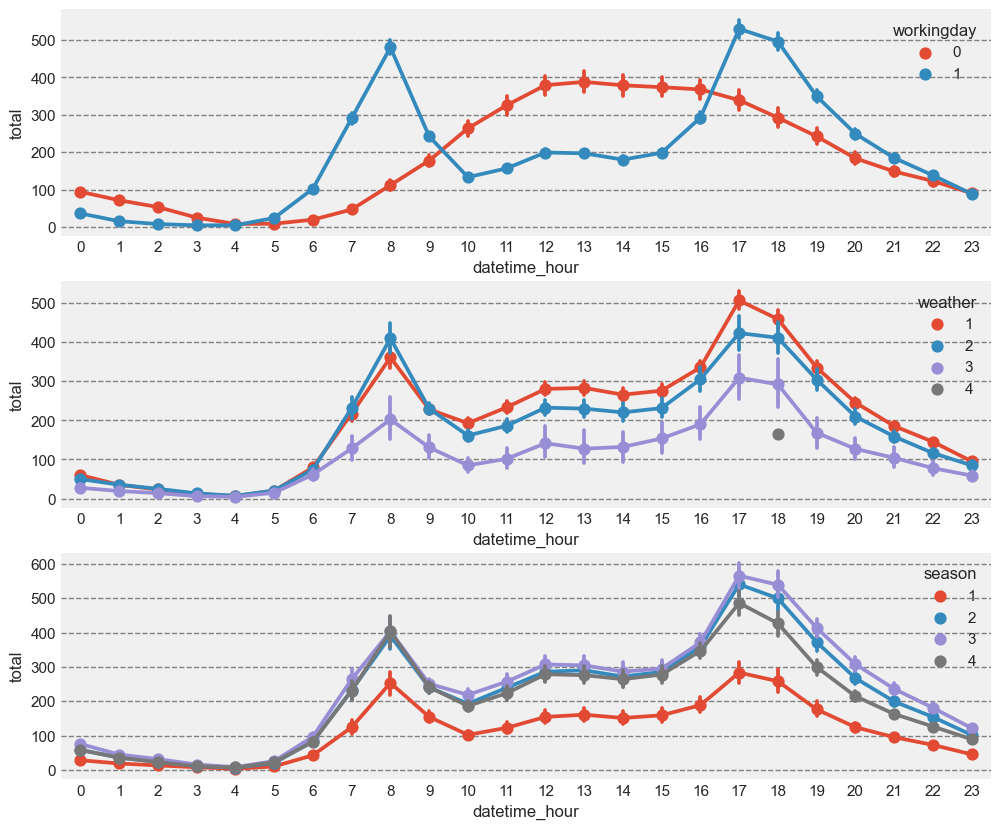

In [374]:

fig,axes = plt.subplots(nrows=3)

fig.set_size_inches(12, 10)


sns.pointplot(x='datetime_hour', y='total', data=df, hue='workingday', ax=axes[0])

sns.pointplot(x='datetime_hour', y='total', data=df, hue='weather', ax=axes[1])

sns.pointplot(x='datetime_hour', y='total', data=df, hue='season', ax=axes[2])



In [218]:
# Outlier analysis

In [219]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp   
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  total  datetime_year   
0        81        0.0       3          13     16           2011  \
1        80        0.0       8          32     40           2011   
2        80        0.0       5          27     32           2011   
3        75        0.0       3          10     13           2011   
4        75        0.0       0           1      1           2011   

   datetime_hour  datetime_month datetime_month_name  datetime_day   
0              0               1             January             1  \
1              1               1             January             1   
2              2               1             January             1   
3              3               1             January             1   
4              4               1             January             1   

  datetime_day_name  
0          Saturday  
1          Saturday  
2          Saturday  
3          Saturday  
4          Saturday

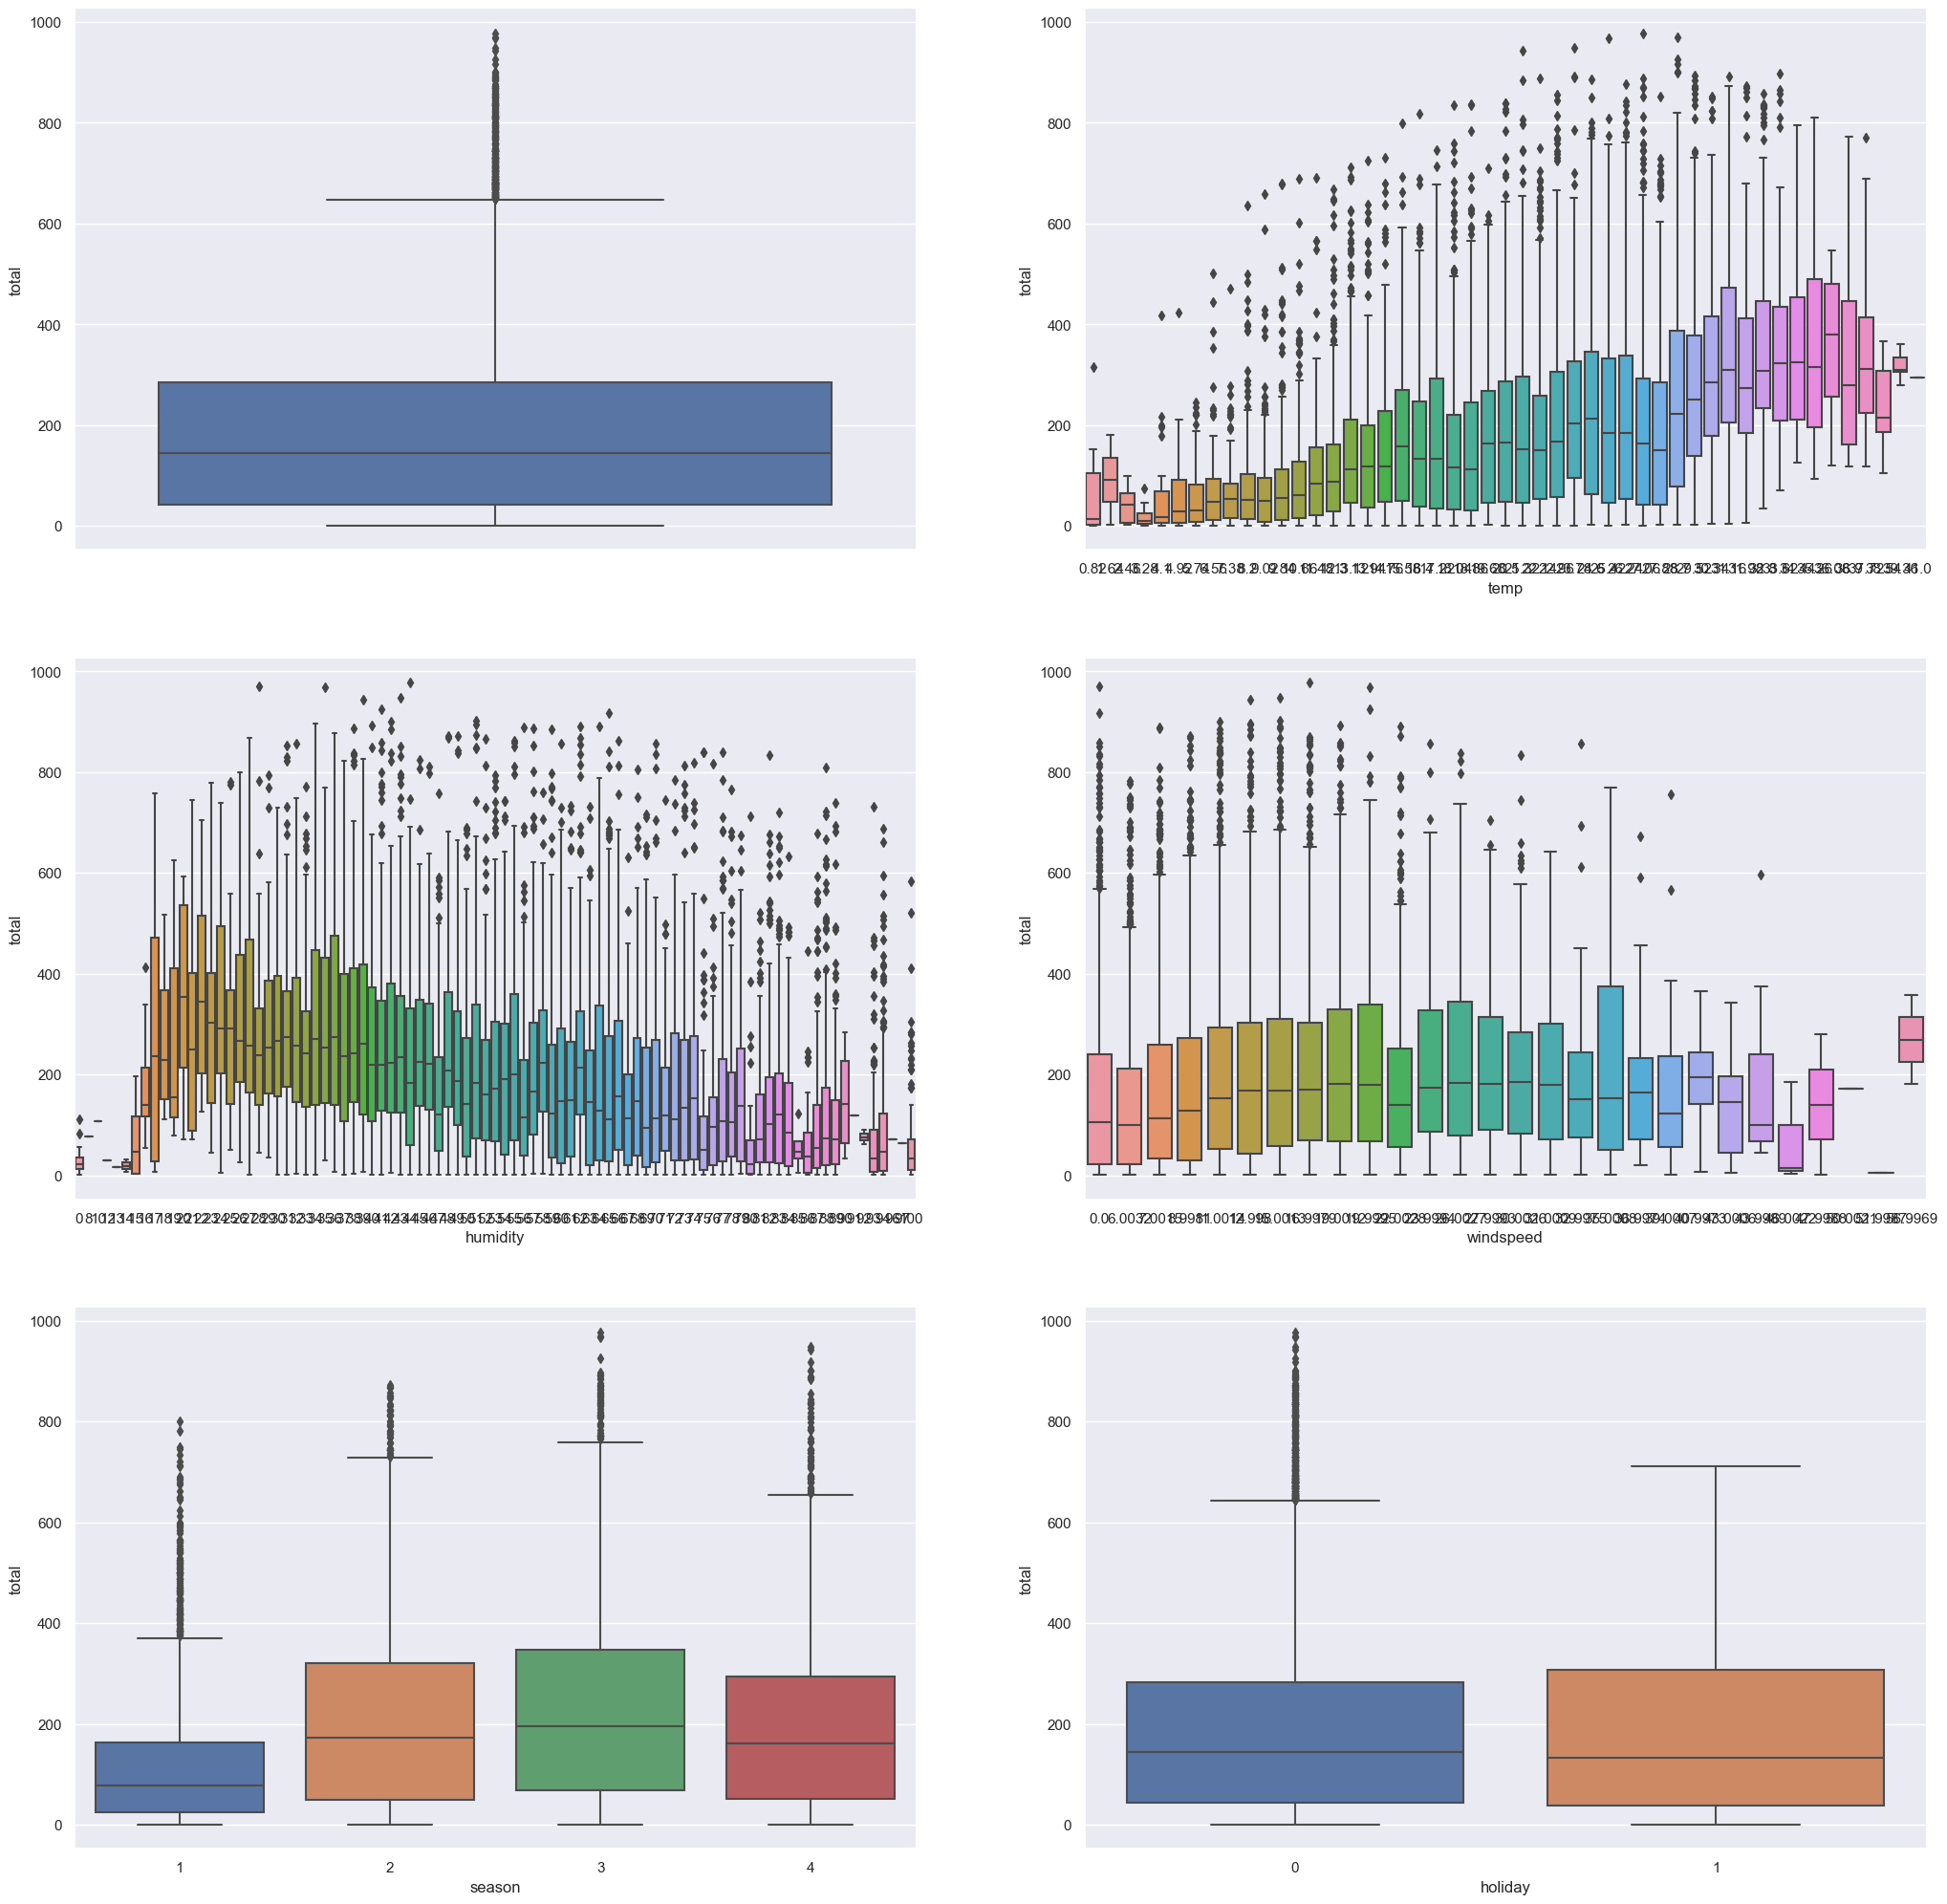

In [220]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(25, 25)
sns.boxplot(data=df, y="total",orient="v",ax=axes[0][0])
sns.boxplot(data=df, y="total",x="temp",orient="v",ax=axes[0][1])
sns.boxplot(data=df, y="total",x="humidity",orient="v",ax=axes[1][0])
sns.boxplot(data=df, y="total",x="windspeed",orient="v",ax=axes[1][1])
sns.boxplot(data=df, y="total",x="season",orient="v",ax=axes[2][0])
sns.boxplot(data=df ,y="total",x="holiday",orient="v",ax=axes[2][1])


sns.despine()


In [375]:
df.reset_index(inplace=True)

In [376]:
df

index            datetime  season  holiday  workingday  weather   temp   
0          0 2011-01-01 00:00:00       1        0           0        1   9.84  \
1          1 2011-01-01 01:00:00       1        0           0        1   9.02   
2          2 2011-01-01 02:00:00       1        0           0        1   9.02   
3          3 2011-01-01 03:00:00       1        0           0        1   9.84   
4          4 2011-01-01 04:00:00       1        0           0        1   9.84   
...      ...                 ...     ...      ...         ...      ...    ...   
10881  10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882  10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883  10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884  10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885  10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  total  datetime_year   
0      14.395        81     0.0000       3          13     16           2011  \
1      13.635        80     0.0000       8          32     40           2011   
2      13.635        80     0.0000       5          27     32           2011   
3      14.395        75     0.0000       3          10     13           2011   
4      14.395        75     0.0000       0           1      1           2011   
...       ...       ...        ...     ...         ...    ...            ...   
10881  19.695        50    26.0027       7         329    336           2012   
10882  17.425        57    15.0013      10         231    241           2012   
10883  15.910        61    15.0013       4         164    168           2012   
10884  17.425        61     6.0032      12         117    129           2012   
10885  16.665        66     8.9981       4          84     88           2012   

       datetime_hour  datetime_month datetime_month_name  datetime_day   
0                  0               1             January             1  \
1                  1               1             January             1   
2                  2               1             January             1   
3                  3               1             January             1   
4                  4               1             January             1   
...              ...             ...                 ...           ...   
10881             19              12            December            19   
10882             20              12            December            19   
10883             21              12            December            19   
10884             22              12            December            19   
10885             23              12            December            19   

      datetime_day_name  
0              Saturday  
1              Saturday  
2              Saturday  
3              Saturday  
4              Saturday  
...                 ...  
10881         Wednesday  
10882         Wednesday  
10883         Wednesday  
10884         Wednesday  
10885         Wednesday  

[10886 rows x 19 columns]

In [377]:
df.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [378]:
df.groupby('datetime_hour').total.mean()

datetime_hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

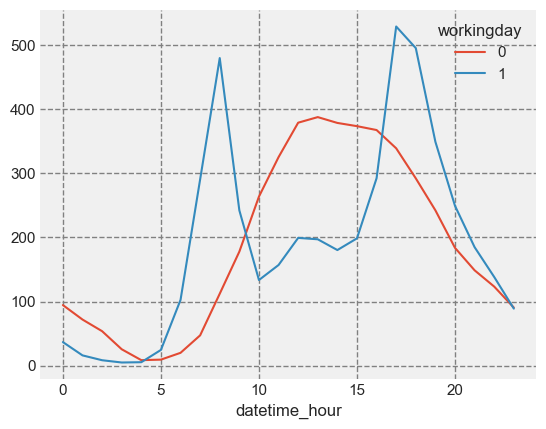

In [379]:
df.groupby(['datetime_hour','workingday']).total.mean().unstack().plot()
sns.despine()

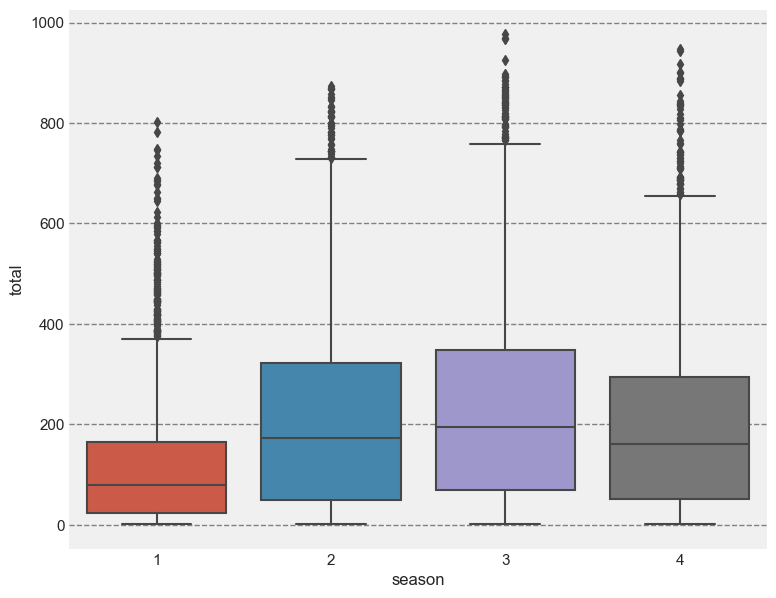

In [380]:
plt.figure(figsize=(9,7))
sns.boxplot( x='season', y='total', data=df);
sns.despine()

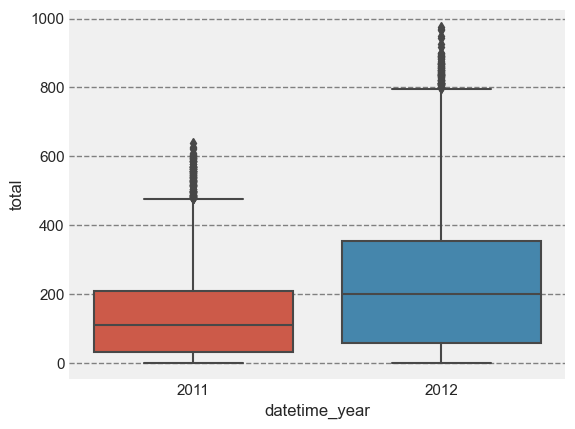

In [381]:
sns.boxplot(data=df[['total', 'datetime_year']],x='datetime_year',y='total')
sns.despine()

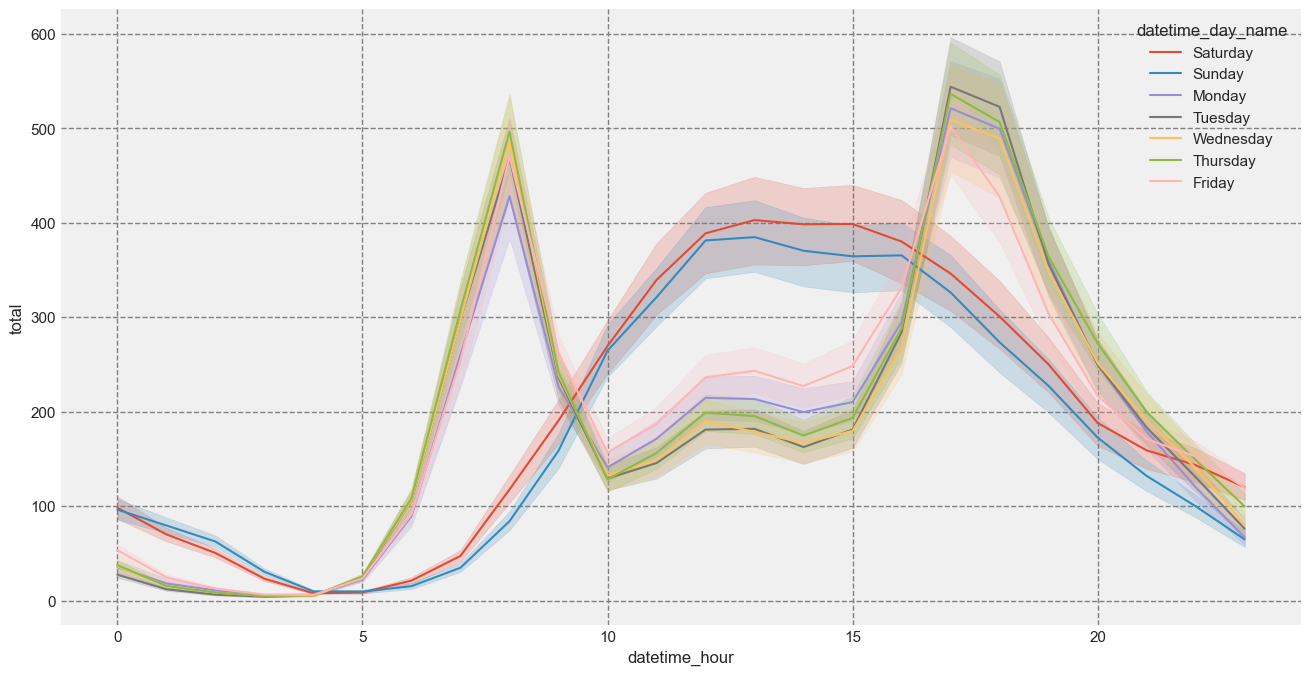

In [382]:
plt.figure(figsize = (16,8))

sns.lineplot(x = 'datetime_hour', y= 'total',hue ='datetime_day_name' , data = df)
sns.despine()

## Preprocessing

In [383]:
# Outlier remove

In [384]:
target = ['total']

/var/folders/g1/stdtphmx6j36mvd7gc84dx3w0000gn/T/ipykernel_2025/3764195199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[target[0]]);


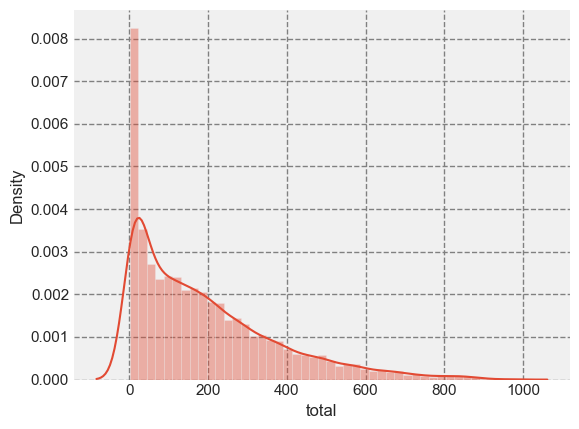

In [385]:
sns.distplot(df[target[0]]);

Samples in train set without outliers: 10586
Number of outliers removed: 300


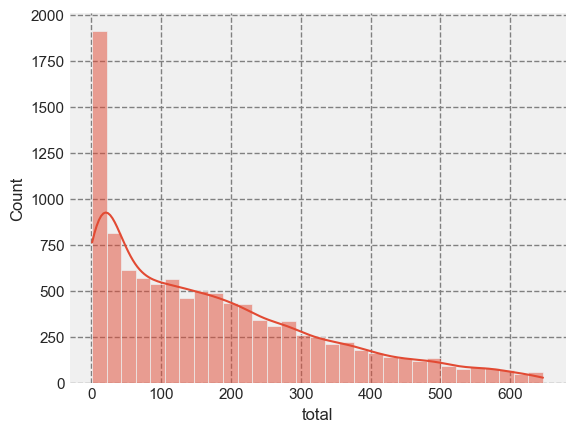

In [386]:
# Calculate IQR and define bounds
q1 = df.total.quantile(0.25)
q3 = df.total.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr) 

# Filter outliers
train_preprocessed = df.loc[(df.total >= lower_bound) & (df.total <= upper_bound)]

print("Samples in train set without outliers: {}".format(len(train_preprocessed)))
print("Number of outliers removed: {}".format(len(df) - len(train_preprocessed)))

# Plot distribution without outliers
sns.histplot(train_preprocessed.total, kde=True);

### Handle Outliers Only in Training: Remove or treat outliers only in the training set and allow the model to encounter outliers in the test set as a true test of its robustness.

In [387]:
#Do two models, for casual and registered, try knn

In [388]:
df

index            datetime  season  holiday  workingday  weather   temp   
0          0 2011-01-01 00:00:00       1        0           0        1   9.84  \
1          1 2011-01-01 01:00:00       1        0           0        1   9.02   
2          2 2011-01-01 02:00:00       1        0           0        1   9.02   
3          3 2011-01-01 03:00:00       1        0           0        1   9.84   
4          4 2011-01-01 04:00:00       1        0           0        1   9.84   
...      ...                 ...     ...      ...         ...      ...    ...   
10881  10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882  10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883  10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884  10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885  10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  total  datetime_year   
0      14.395        81     0.0000       3          13     16           2011  \
1      13.635        80     0.0000       8          32     40           2011   
2      13.635        80     0.0000       5          27     32           2011   
3      14.395        75     0.0000       3          10     13           2011   
4      14.395        75     0.0000       0           1      1           2011   
...       ...       ...        ...     ...         ...    ...            ...   
10881  19.695        50    26.0027       7         329    336           2012   
10882  17.425        57    15.0013      10         231    241           2012   
10883  15.910        61    15.0013       4         164    168           2012   
10884  17.425        61     6.0032      12         117    129           2012   
10885  16.665        66     8.9981       4          84     88           2012   

       datetime_hour  datetime_month datetime_month_name  datetime_day   
0                  0               1             January             1  \
1                  1               1             January             1   
2                  2               1             January             1   
3                  3               1             January             1   
4                  4               1             January             1   
...              ...             ...                 ...           ...   
10881             19              12            December            19   
10882             20              12            December            19   
10883             21              12            December            19   
10884             22              12            December            19   
10885             23              12            December            19   

      datetime_day_name  
0              Saturday  
1              Saturday  
2              Saturday  
3              Saturday  
4              Saturday  
...                 ...  
10881         Wednesday  
10882         Wednesday  
10883         Wednesday  
10884         Wednesday  
10885         Wednesday  

[10886 rows x 19 columns]

In [389]:
## Feature Engineering

In [390]:
df


index            datetime  season  holiday  workingday  weather   temp   
0          0 2011-01-01 00:00:00       1        0           0        1   9.84  \
1          1 2011-01-01 01:00:00       1        0           0        1   9.02   
2          2 2011-01-01 02:00:00       1        0           0        1   9.02   
3          3 2011-01-01 03:00:00       1        0           0        1   9.84   
4          4 2011-01-01 04:00:00       1        0           0        1   9.84   
...      ...                 ...     ...      ...         ...      ...    ...   
10881  10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882  10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883  10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884  10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885  10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  total  datetime_year   
0      14.395        81     0.0000       3          13     16           2011  \
1      13.635        80     0.0000       8          32     40           2011   
2      13.635        80     0.0000       5          27     32           2011   
3      14.395        75     0.0000       3          10     13           2011   
4      14.395        75     0.0000       0           1      1           2011   
...       ...       ...        ...     ...         ...    ...            ...   
10881  19.695        50    26.0027       7         329    336           2012   
10882  17.425        57    15.0013      10         231    241           2012   
10883  15.910        61    15.0013       4         164    168           2012   
10884  17.425        61     6.0032      12         117    129           2012   
10885  16.665        66     8.9981       4          84     88           2012   

       datetime_hour  datetime_month datetime_month_name  datetime_day   
0                  0               1             January             1  \
1                  1               1             January             1   
2                  2               1             January             1   
3                  3               1             January             1   
4                  4               1             January             1   
...              ...             ...                 ...           ...   
10881             19              12            December            19   
10882             20              12            December            19   
10883             21              12            December            19   
10884             22              12            December            19   
10885             23              12            December            19   

      datetime_day_name  
0              Saturday  
1              Saturday  
2              Saturday  
3              Saturday  
4              Saturday  
...                 ...  
10881         Wednesday  
10882         Wednesday  
10883         Wednesday  
10884         Wednesday  
10885         Wednesday  

[10886 rows x 19 columns]

In [391]:
df

index            datetime  season  holiday  workingday  weather   temp   
0          0 2011-01-01 00:00:00       1        0           0        1   9.84  \
1          1 2011-01-01 01:00:00       1        0           0        1   9.02   
2          2 2011-01-01 02:00:00       1        0           0        1   9.02   
3          3 2011-01-01 03:00:00       1        0           0        1   9.84   
4          4 2011-01-01 04:00:00       1        0           0        1   9.84   
...      ...                 ...     ...      ...         ...      ...    ...   
10881  10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882  10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883  10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884  10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885  10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  total  datetime_year   
0      14.395        81     0.0000       3          13     16           2011  \
1      13.635        80     0.0000       8          32     40           2011   
2      13.635        80     0.0000       5          27     32           2011   
3      14.395        75     0.0000       3          10     13           2011   
4      14.395        75     0.0000       0           1      1           2011   
...       ...       ...        ...     ...         ...    ...            ...   
10881  19.695        50    26.0027       7         329    336           2012   
10882  17.425        57    15.0013      10         231    241           2012   
10883  15.910        61    15.0013       4         164    168           2012   
10884  17.425        61     6.0032      12         117    129           2012   
10885  16.665        66     8.9981       4          84     88           2012   

       datetime_hour  datetime_month datetime_month_name  datetime_day   
0                  0               1             January             1  \
1                  1               1             January             1   
2                  2               1             January             1   
3                  3               1             January             1   
4                  4               1             January             1   
...              ...             ...                 ...           ...   
10881             19              12            December            19   
10882             20              12            December            19   
10883             21              12            December            19   
10884             22              12            December            19   
10885             23              12            December            19   

      datetime_day_name  
0              Saturday  
1              Saturday  
2              Saturday  
3              Saturday  
4              Saturday  
...                 ...  
10881         Wednesday  
10882         Wednesday  
10883         Wednesday  
10884         Wednesday  
10885         Wednesday  

[10886 rows x 19 columns]

In [392]:
X = df.drop(columns=["total", "registered", "atemp"])

In [393]:
X

index            datetime  season  holiday  workingday  weather   temp   
0          0 2011-01-01 00:00:00       1        0           0        1   9.84  \
1          1 2011-01-01 01:00:00       1        0           0        1   9.02   
2          2 2011-01-01 02:00:00       1        0           0        1   9.02   
3          3 2011-01-01 03:00:00       1        0           0        1   9.84   
4          4 2011-01-01 04:00:00       1        0           0        1   9.84   
...      ...                 ...     ...      ...         ...      ...    ...   
10881  10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882  10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883  10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884  10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885  10885 2012-12-19 23:00:00       4        0           1        1  13.12   

       humidity  windspeed  casual  datetime_year  datetime_hour   
0            81     0.0000       3           2011              0  \
1            80     0.0000       8           2011              1   
2            80     0.0000       5           2011              2   
3            75     0.0000       3           2011              3   
4            75     0.0000       0           2011              4   
...         ...        ...     ...            ...            ...   
10881        50    26.0027       7           2012             19   
10882        57    15.0013      10           2012             20   
10883        61    15.0013       4           2012             21   
10884        61     6.0032      12           2012             22   
10885        66     8.9981       4           2012             23   

       datetime_month datetime_month_name  datetime_day datetime_day_name  
0                   1             January             1          Saturday  
1                   1             January             1          Saturday  
2                   1             January             1          Saturday  
3                   1             January             1          Saturday  
4                   1             January             1          Saturday  
...               ...                 ...           ...               ...  
10881              12            December            19         Wednesday  
10882              12            December            19         Wednesday  
10883              12            December            19         Wednesday  
10884              12            December            19         Wednesday  
10885              12            December            19         Wednesday  

[10886 rows x 16 columns]

In [394]:
y = df["total"]


In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [396]:
## Define pipelines one for numerical and one for categorical features

In [397]:

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x.to_numpy() / period * 2 * np.pi).reshape(-1, 1))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x.to_numpy() / period * 2 * np.pi).reshape(-1, 1))


In [398]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                        MinMaxScaler(), PolynomialFeatures(include_bias=False,degree=2)
)

cat_pipe=make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                      )

In [453]:
class MyTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, column_names, period=1):
        self.column_names = column_names
        self.period =period
        
        
    def sin_transformer(self):
        # No need to call .to_numpy() because the input is already a NumPy array
        return FunctionTransformer(lambda x: np.sin(x / self.period * 2 * np.pi).reshape(-1, 1))

    def cos_transformer(self):
        # No need to call .to_numpy() because the input is already a NumPy array
        return FunctionTransformer(lambda x: np.cos(x / self.period * 2 * np.pi).reshape(-1, 1))


    def fit(self, X, y=None):
        return self  # The fit method typically does nothing for transformers
    
    def transform(self, X):
        X_transformed = X.copy()  
        for column_name in self.column_names:
            # Apply sine transformation directly to the column and store in the new column
            X_transformed[column_name + '_sin'] = self.sin_transformer().fit_transform(X[column_name].values.reshape(-1, 1)).reshape(-1)
            
            # Apply cosine transformation directly to the column and store in the new column
            X_transformed[column_name + '_cos'] = self.cos_transformer().fit_transform(X[column_name].values.reshape(-1, 1)).reshape(-1)
            
            # Example of another transformation - doubling the values in the column
            X_transformed[column_name] = X_transformed[column_name].apply(lambda x: x * 2)
        
        return X_transformed
   


In [454]:
X_train

index            datetime  season  holiday  workingday  weather   temp   
2930   2930 2011-07-11 00:00:00       3        0           1        1  28.70  \
7669   7669 2012-05-18 22:00:00       2        0           1        1  22.96   
1346   1346 2011-04-01 23:00:00       2        0           1        1  12.30   
9432   9432 2012-09-16 09:00:00       3        0           0        1  23.78   
453     453 2011-02-01 23:00:00       1        0           1        3   8.20   
...     ...                 ...     ...      ...         ...      ...    ...   
5734   5734 2012-01-14 02:00:00       1        0           0        1   6.56   
5191   5191 2011-12-10 09:00:00       4        0           0        1  11.48   
5390   5390 2011-12-18 16:00:00       4        0           0        1  11.48   
860     860 2011-02-19 07:00:00       1        0           0        1  15.58   
7270   7270 2012-05-02 07:00:00       2        0           1        2  22.14   

      humidity  windspeed  casual  datetime_year  datetime_hour   
2930        65    12.9980      10           2011              0  \
7669        52    22.0028      57           2012             22   
1346        61     6.0032      12           2011             23   
9432        60     8.9981      70           2012              9   
453         93    12.9980       1           2011             23   
...        ...        ...     ...            ...            ...   
5734        47    11.0014       6           2012              2   
5191        61    19.0012      15           2011              9   
5390        48    16.9979      27           2011             16   
860         17    35.0008       6           2011              7   
7270        88    12.9980      14           2012              7   

      datetime_month datetime_month_name  datetime_day datetime_day_name  
2930               7                July            11            Monday  
7669               5                 May            18            Friday  
1346               4               April             1            Friday  
9432               9           September            16            Sunday  
453                2            February             1           Tuesday  
...              ...                 ...           ...               ...  
5734               1             January            14          Saturday  
5191              12            December            10          Saturday  
5390              12            December            18            Sunday  
860                2            February            19          Saturday  
7270               5                 May             2         Wednesday  

[8164 rows x 16 columns]

In [455]:

feature_transform = ColumnTransformer(
    transformers=[
        ("num", num_pipe, ['temp', 'humidity', 'windspeed']),  # Apply num_pipe to numerical columns
        ("cat", cat_pipe, ['holiday', 'workingday', 'season', 'weather']),  # Apply cat_pipe to categorical columns
        ("custom", MyTransformer(column_names=["datetime_hour"], period=24), ["datetime_hour"])  # Apply MyTransformer to 'time' column
    ],
    remainder="drop"
)

In [456]:
feature_transform.fit(X_train)  

/Users/saramaras/miniconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['temp', 'humidity', 'windspeed']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['holiday', 'workingday', 'season',
                                  'weather']),
                                ('custom',
                                 MyTransformer(column_names=['datetime_hour'],
                                               period=24),
                                 ['datetime_hour'])])

In [458]:
X_train_fe = feature_transform.transform(X_train)  # use this to train your model
X_test_fe = feature_transform.transform(X_test)

In [459]:
X_train_fe    #change column names

num__temp  num__humidity  num__windspeed  num__temp^2   
2930   0.693878           0.65        0.228047     0.481466  \
7669   0.551020           0.52        0.386035     0.303623   
1346   0.285714           0.61        0.105325     0.081633   
9432   0.571429           0.60        0.157870     0.326531   
453    0.183673           0.93        0.228047     0.033736   
...         ...            ...             ...          ...   
5734   0.142857           0.47        0.193018     0.020408   
5191   0.265306           0.61        0.333373     0.070387   
5390   0.265306           0.48        0.298225     0.070387   
860    0.367347           0.17        0.614083     0.134944   
7270   0.530612           0.88        0.228047     0.281549   

      num__temp humidity  num__temp windspeed  num__humidity^2   
2930            0.451020             0.158237           0.4225  \
7669            0.286531             0.212713           0.2704   
1346            0.174286             0.030093           0.3721   
9432            0.342857             0.090211           0.3600   
453             0.170816             0.041886           0.8649   
...                  ...                  ...              ...   
5734            0.067143             0.027574           0.2209   
5191            0.161837             0.088446           0.3721   
5390            0.127347             0.079121           0.2304   
860             0.062449             0.225581           0.0289   
7270            0.466939             0.121005           0.7744   

      num__humidity windspeed  num__windspeed^2  cat__holiday_0  ...   
2930                 0.148231          0.052006             1.0  ...  \
7669                 0.200738          0.149023             1.0  ...   
1346                 0.064248          0.011093             1.0  ...   
9432                 0.094722          0.024923             1.0  ...   
453                  0.212084          0.052006             1.0  ...   
...                       ...               ...             ...  ...   
5734                 0.090718          0.037256             1.0  ...   
5191                 0.203357          0.111137             1.0  ...   
5390                 0.143148          0.088938             1.0  ...   
860                  0.104394          0.377097             1.0  ...   
7270                 0.200682          0.052006             1.0  ...   

      cat__season_2  cat__season_3  cat__season_4  cat__weather_1   
2930            0.0            1.0            0.0             1.0  \
7669            1.0            0.0            0.0             1.0   
1346            1.0            0.0            0.0             1.0   
9432            0.0            1.0            0.0             1.0   
453             0.0            0.0            0.0             0.0   
...             ...            ...            ...             ...   
5734            0.0            0.0            0.0             1.0   
5191            0.0            0.0            1.0             1.0   
5390            0.0            0.0            1.0             1.0   
860             0.0            0.0            0.0             1.0   
7270            1.0            0.0            0.0             0.0   

      cat__weather_2  cat__weather_3  cat__weather_4  custom__datetime_hour   
2930             0.0             0.0             0.0                      0  \
7669             0.0             0.0             0.0                     44   
1346             0.0             0.0             0.0                     46   
9432             0.0             0.0             0.0                     18   
453              0.0             1.0             0.0                     46   
...              ...             ...             ...                    ...   
5734             0.0             0.0             0.0                      4   
5191             0.0             0.0             0.0                     18   
5390             0.0             0.0             0.

In [460]:
linreg = LinearRegression()

In [461]:
linreg.fit(X_train_fe,y_train)

LinearRegression()

In [462]:
y_pred_train=linreg.predict(X_train_fe)
y_pred_test=linreg.predict(X_test_fe)

In [463]:
print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))

r_2 score train : 0.46628879994658967
r_2 score test : 0.4541200398683439


In [464]:
## Create a function with different models, add the best hyperparameter

In [465]:
rf = RandomForestRegressor(max_depth=5, random_state=0)
rf.fit(X_train_fe, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [466]:
def train_model(X_train_fe, y_train, X_test_fe, y_test):
    
    model_params = {
        
        "LinearRegression": { 
            "model": LinearRegression(),
            "params": { 
            }
        
        },
                             
        "PoissonRegressor":{
            "model": PoissonRegressor(max_iter=1000),
            "params": {
                "alpha": [0.1, 0.5, 1.0, 5.0, 10.0]
            }
        },
            
        "Ridge": {
            "model": Ridge(max_iter=1000, tol=1e-3),
            "params": {
                "alpha": [0.1, 1.0, 10.0, 100.0]
            }
        },
        
        "Lasso": {
            "model": Lasso(max_iter=1000, tol=1e-3),
            "params": {
                
                "alpha":[0.001, 0.01, 0.1, 1.0, 10.0]
            }
        },
        
        "ElasticNet": {
            "model": ElasticNet(max_iter=1000, tol=1e-3),
            "params": {
                "alpha": [0.001, 0.01, 0.1, 1.0],
                "l1_ratio": [0.1, 0.5, 0.7, 1.0]
            }
        },
             'HistGradientBoostingRegressor': {
            'model': HistGradientBoostingRegressor(),
            'params': {
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 10],
                'min_samples_leaf': [10, 20, 30]
            }
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
        }
    }
            
            
    
  
    
    results = {}
    
    for model_name, model_info in model_params.items():
        
        grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_fe, y_train)
       
        results[model_name] = {
            "best_model": grid_search.best_estimator_,
            "best_score": grid_search.best_score_,
            "best_params": grid_search.best_params_
        }
        
        
        
    return results

In [467]:
results = train_model(X_train_fe, y_train, X_test_fe, y_test)

/Users/saramaras/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/saramaras/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/saramaras/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

In [468]:
results

{'LinearRegression': {'best_model': LinearRegression(),
  'best_score': 0.464486843837795,
  'best_params': {}},
 'PoissonRegressor': {'best_model': PoissonRegressor(alpha=0.1, max_iter=1000),
  'best_score': 0.44089929505595055,
  'best_params': {'alpha': 0.1}},
 'Ridge': {'best_model': Ridge(alpha=0.1, max_iter=1000, tol=0.001),
  'best_score': 0.46446712810997015,
  'best_params': {'alpha': 0.1}},
 'Lasso': {'best_model': Lasso(alpha=0.001, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001}},
 'ElasticNet': {'best_model': ElasticNet(alpha=0.001, l1_ratio=1.0, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001, 'l1_ratio': 1.0}},
 'HistGradientBoostingRegressor': {'best_model': HistGradientBoostingRegressor(max_depth=10, min_samples_leaf=10),
  'best_score': 0.8461255458054545,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 10,
   'min_samples_leaf': 10}},
 'RandomForestRegressor': {'best_model': RandomForestRegres

In [469]:
results_df = pd.DataFrame(results)
results_df

LinearRegression                            PoissonRegressor   
best_model   LinearRegression()  PoissonRegressor(alpha=0.1, max_iter=1000)  \
best_score             0.464487                                    0.440899   
best_params                  {}                              {'alpha': 0.1}   

                                                  Ridge   
best_model   Ridge(alpha=0.1, max_iter=1000, tol=0.001)  \
best_score                                     0.464467   
best_params                              {'alpha': 0.1}   

                                     Lasso   
best_model   Lasso(alpha=0.001, tol=0.001)  \
best_score                        0.464486   
best_params               {'alpha': 0.001}   

                                                   ElasticNet   
best_model   ElasticNet(alpha=0.001, l1_ratio=1.0, tol=0.001)  \
best_score                                           0.464486   
best_params                 {'alpha': 0.001, 'l1_ratio': 1.0}   

                                 HistGradientBoostingRegressor   
best_model   HistGradientBoostingRegressor(max_depth=10, mi...  \
best_score                                            0.846126   
best_params  {'learning_rate': 0.1, 'max_depth': 10, 'min_s...   

                                         RandomForestRegressor  
best_model   (DecisionTreeRegressor(max_features=1.0, rando...  
best_score                                            0.835179  
best_params  {'max_depth': None, 'min_samples_split': 2, 'n...

In [470]:
results.keys()

dict_keys(['LinearRegression', 'PoissonRegressor', 'Ridge', 'Lasso', 'ElasticNet', 'HistGradientBoostingRegressor', 'RandomForestRegressor'])

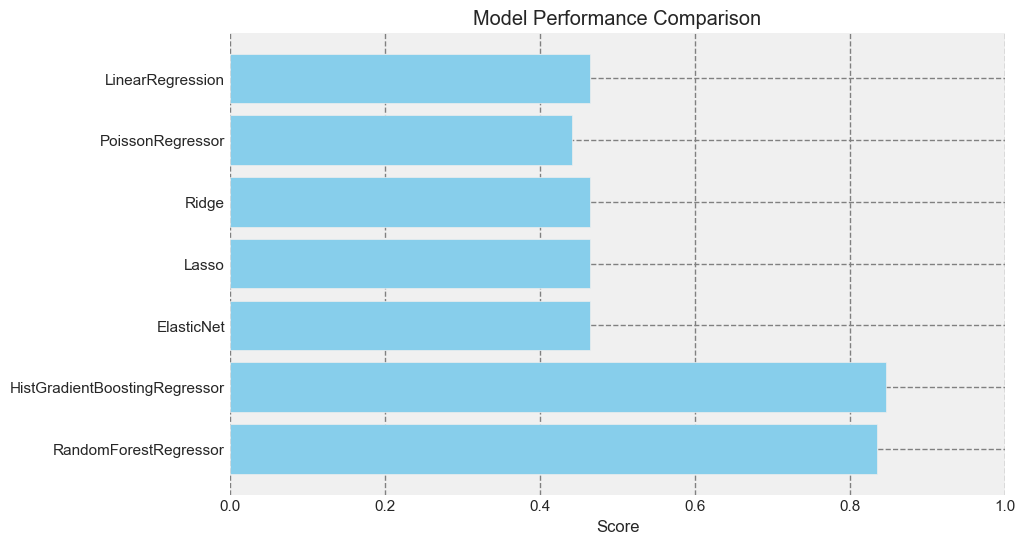

In [471]:
# Extract model names and scores
model_names = list(results.keys())
scores = [results[model]["best_score"] for model in model_names]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(model_names, scores, color='skyblue')
plt.xlabel('Score')
plt.title('Model Performance Comparison')
plt.xlim([0, 1.0])
plt.gca().invert_yaxis()  # Optional: invert y-axis for descending order
sns.despine()

In [472]:
results

{'LinearRegression': {'best_model': LinearRegression(),
  'best_score': 0.464486843837795,
  'best_params': {}},
 'PoissonRegressor': {'best_model': PoissonRegressor(alpha=0.1, max_iter=1000),
  'best_score': 0.44089929505595055,
  'best_params': {'alpha': 0.1}},
 'Ridge': {'best_model': Ridge(alpha=0.1, max_iter=1000, tol=0.001),
  'best_score': 0.46446712810997015,
  'best_params': {'alpha': 0.1}},
 'Lasso': {'best_model': Lasso(alpha=0.001, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001}},
 'ElasticNet': {'best_model': ElasticNet(alpha=0.001, l1_ratio=1.0, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001, 'l1_ratio': 1.0}},
 'HistGradientBoostingRegressor': {'best_model': HistGradientBoostingRegressor(max_depth=10, min_samples_leaf=10),
  'best_score': 0.8461255458054545,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 10,
   'min_samples_leaf': 10}},
 'RandomForestRegressor': {'best_model': RandomForestRegres

In [473]:
#Iterate through dict

In [474]:
results

{'LinearRegression': {'best_model': LinearRegression(),
  'best_score': 0.464486843837795,
  'best_params': {}},
 'PoissonRegressor': {'best_model': PoissonRegressor(alpha=0.1, max_iter=1000),
  'best_score': 0.44089929505595055,
  'best_params': {'alpha': 0.1}},
 'Ridge': {'best_model': Ridge(alpha=0.1, max_iter=1000, tol=0.001),
  'best_score': 0.46446712810997015,
  'best_params': {'alpha': 0.1}},
 'Lasso': {'best_model': Lasso(alpha=0.001, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001}},
 'ElasticNet': {'best_model': ElasticNet(alpha=0.001, l1_ratio=1.0, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001, 'l1_ratio': 1.0}},
 'HistGradientBoostingRegressor': {'best_model': HistGradientBoostingRegressor(max_depth=10, min_samples_leaf=10),
  'best_score': 0.8461255458054545,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 10,
   'min_samples_leaf': 10}},
 'RandomForestRegressor': {'best_model': RandomForestRegres

In [475]:
shap_values_dict = {}

for model_name, model_info in results.items():
    best_model = model_info["best_model"]
    
    
    if isinstance(best_model, (RandomForestRegressor, 
                               HistGradientBoostingRegressor)):
                  
                  explainer = shap.Explainer(best_model, X_test_fe) 
                  shap_values = explainer.shap_values(X_test_fe, check_additivity=False)
                  
    else:
                   
                  explainer = shap.Explainer(best_model, X_test_fe) 
                  shap_values = explainer.shap_values(X_test_fe)
                  
                  
                  
                  
                  
    shap_values_dict[model_name] = shap_values


100%|===================| 2718/2722 [05:11<00:00]        

In [476]:
shap_values_dict.keys()

dict_keys(['LinearRegression', 'PoissonRegressor', 'Ridge', 'Lasso', 'ElasticNet', 'HistGradientBoostingRegressor', 'RandomForestRegressor'])

In [477]:
X_test_fe

num__temp  num__humidity  num__windspeed  num__temp^2   
3133   0.816327           0.59        0.000000     0.666389  \
5786   0.081633           0.54        0.105325     0.006664   
5224   0.224490           0.48        0.228047     0.050396   
8953   0.714286           0.62        0.228047     0.510204   
8054   0.612245           0.53        0.298225     0.374844   
...         ...            ...             ...          ...   
1314   0.489796           0.29        0.491243     0.239900   
5605   0.387755           0.37        0.350888     0.150354   
2935   0.653061           0.74        0.157870     0.426489   
3058   0.653061           0.65        0.193018     0.426489   
12     0.408163           0.77        0.333373     0.166597   

      num__temp humidity  num__temp windspeed  num__humidity^2   
3133            0.481633             0.000000           0.3481  \
5786            0.044082             0.008598           0.2916   
5224            0.107755             0.051194           0.2304   
8953            0.442857             0.162891           0.3844   
8054            0.324490             0.182587           0.2809   
...                  ...                  ...              ...   
1314            0.142041             0.240609           0.0841   
5605            0.143469             0.136058           0.1369   
2935            0.483265             0.103099           0.5476   
3058            0.424490             0.126052           0.4225   
12              0.314286             0.136070           0.5929   

      num__humidity windspeed  num__windspeed^2  cat__holiday_0  ...   
3133                 0.000000          0.000000             1.0  ...  \
5786                 0.056876          0.011093             0.0  ...   
5224                 0.109463          0.052006             1.0  ...   
8953                 0.141389          0.052006             1.0  ...   
8054                 0.158059          0.088938             1.0  ...   
...                       ...               ...             ...  ...   
1314                 0.142460          0.241319             1.0  ...   
5605                 0.129828          0.123122             1.0  ...   
2935                 0.116824          0.024923             1.0  ...   
3058                 0.125461          0.037256             1.0  ...   
12                   0.256697          0.111137             1.0  ...   

      cat__season_2  cat__season_3  cat__season_4  cat__weather_1   
3133            0.0            1.0            0.0             1.0  \
5786            0.0            0.0            0.0             1.0   
5224            0.0            0.0            1.0             1.0   
8953            0.0            1.0            0.0             0.0   
8054            1.0            0.0            0.0             1.0   
...             ...            ...            ...             ...   
1314            0.0            0.0            0.0             1.0   
5605            0.0            0.0            0.0             1.0   
2935            0.0            1.0            0.0             1.0   
3058            0.0            1.0            0.0             1.0   
12              0.0            0.0            0.0             1.0   

      cat__weather_2  cat__weather_3  cat__weather_4  custom__datetime_hour   
3133             0.0             0.0             0.0                     22  \
5786             0.0             0.0             0.0                     12   
5224             0.0             0.0             0.0                     36   
8953             1.0             0.0             0.0                     20   
8054             0.0             0.0             0.0                     46   
...              ...             ...             ...                    ...   
1314             0.0             0.0             0.0                     30   
5605             0.0             0.0             0.0                     32   
2935             0.0             0.0             0.

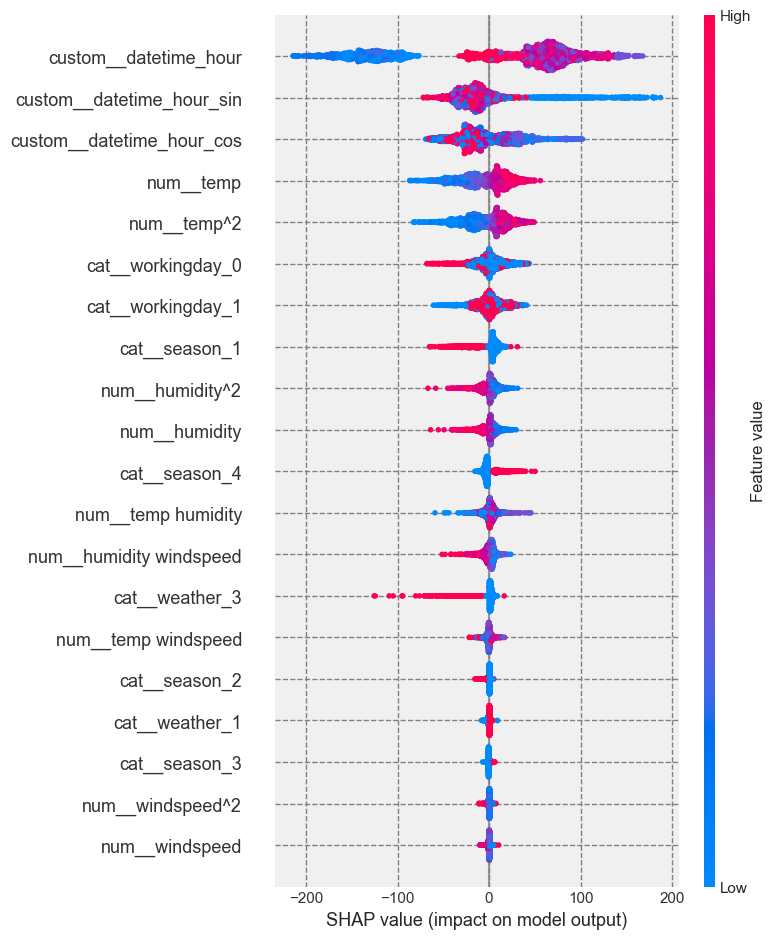

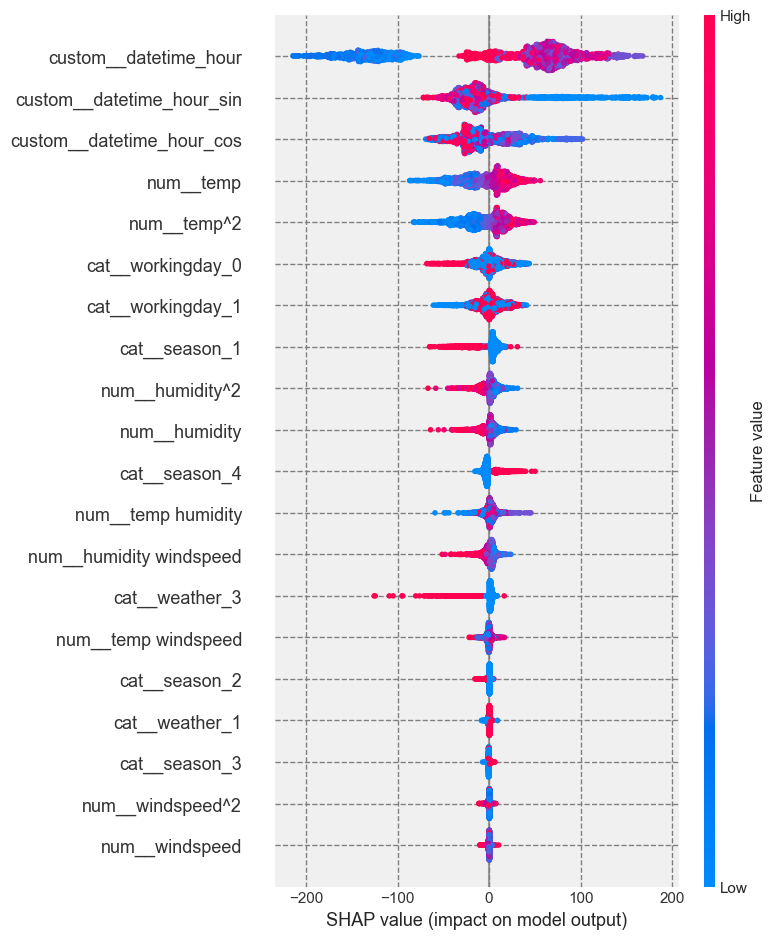

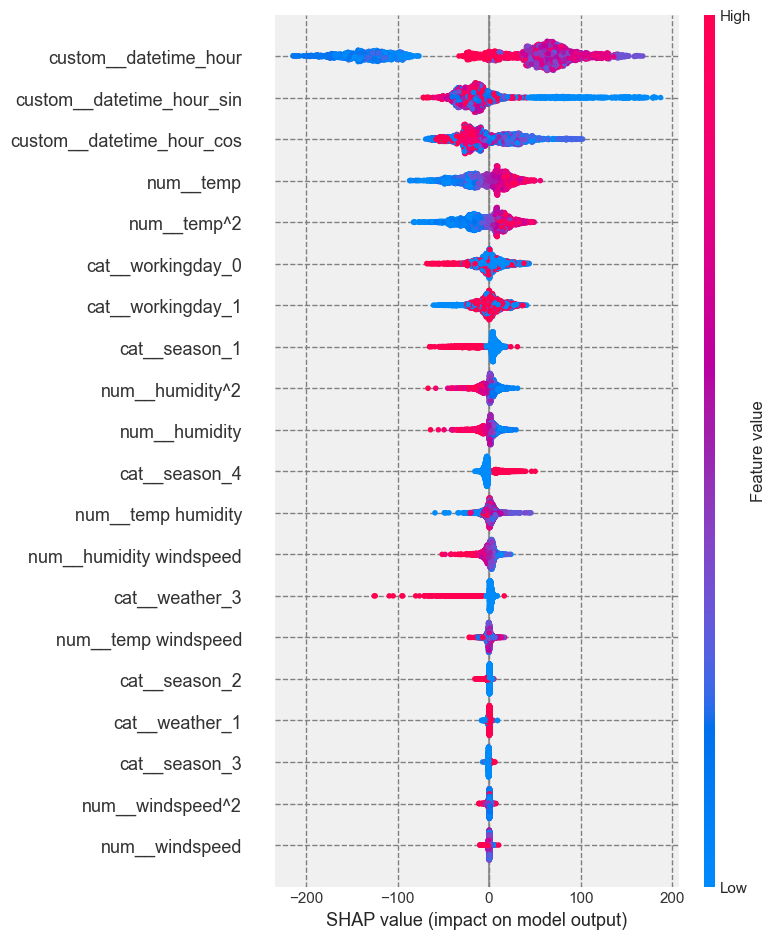

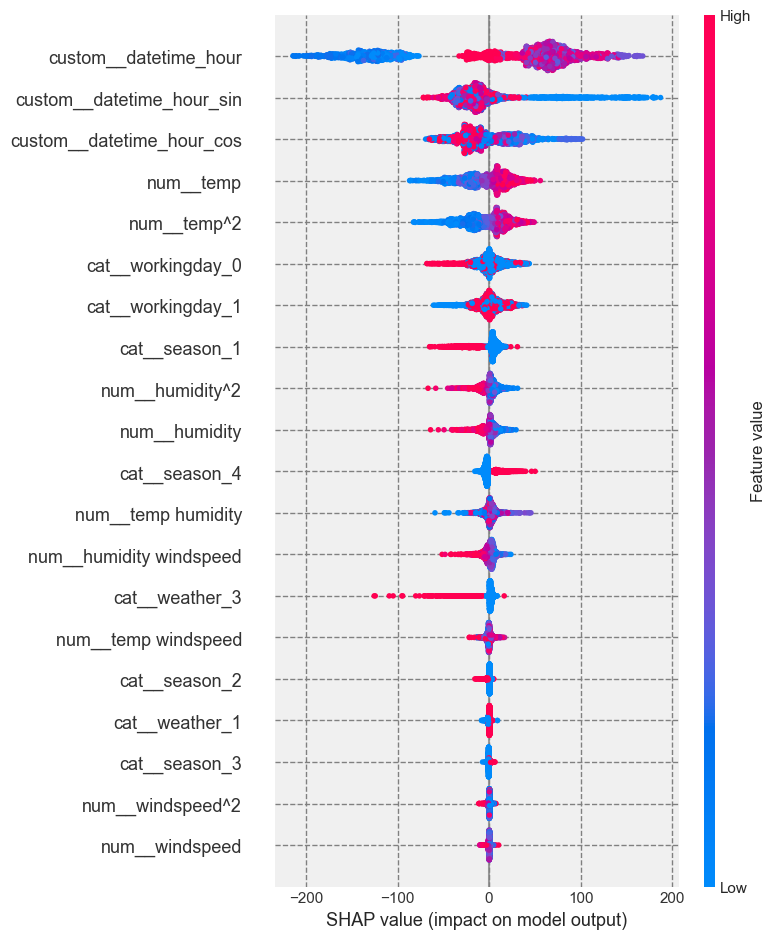

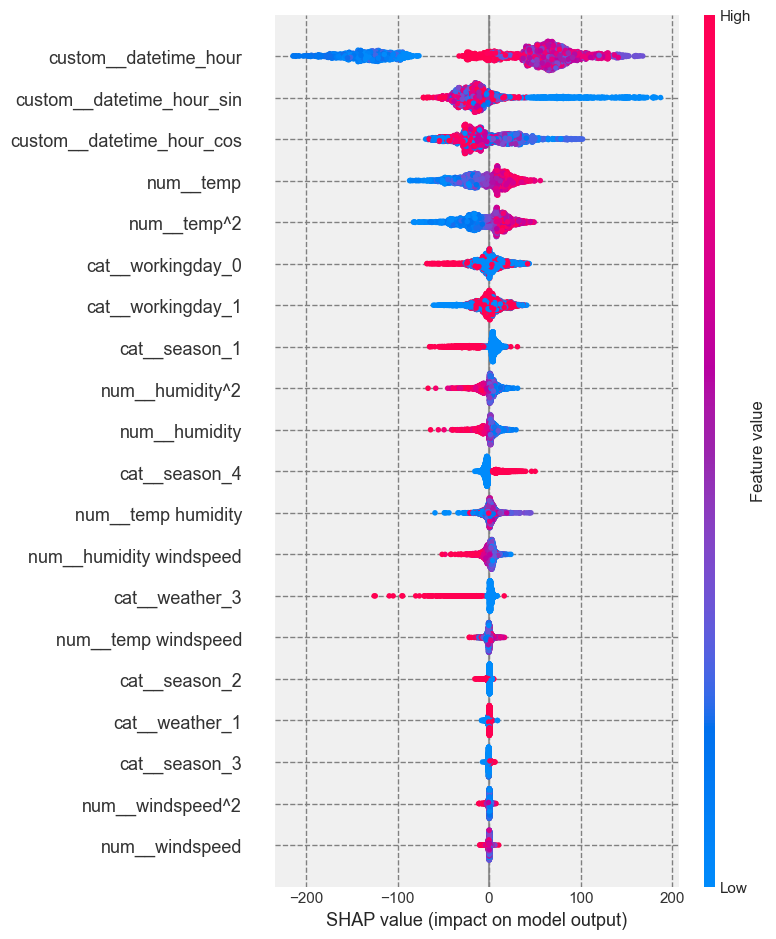

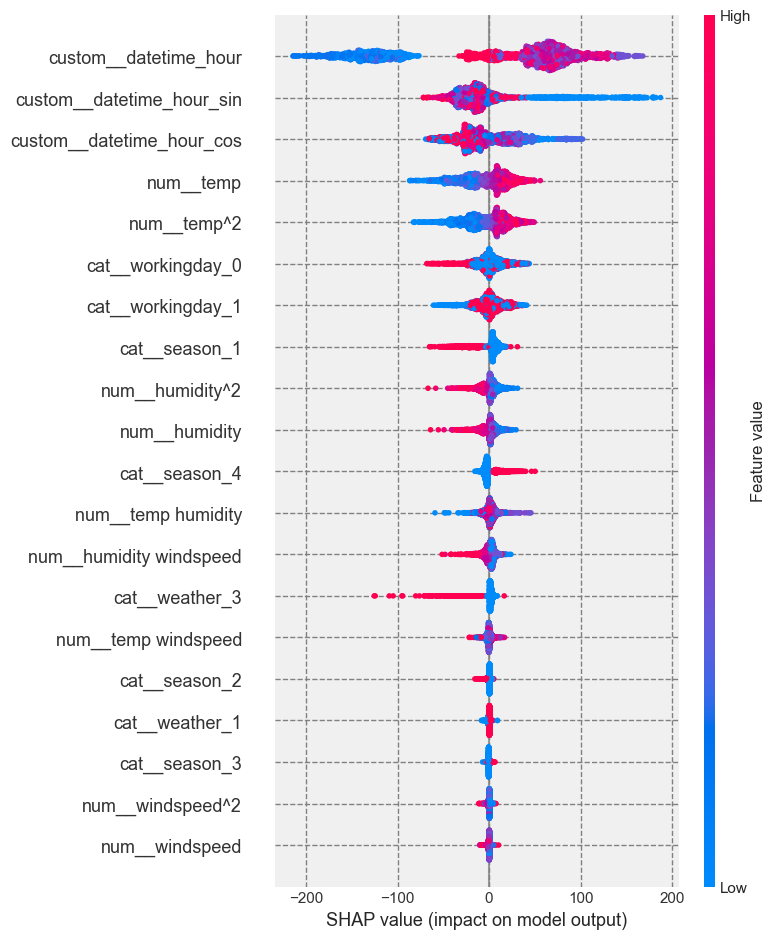

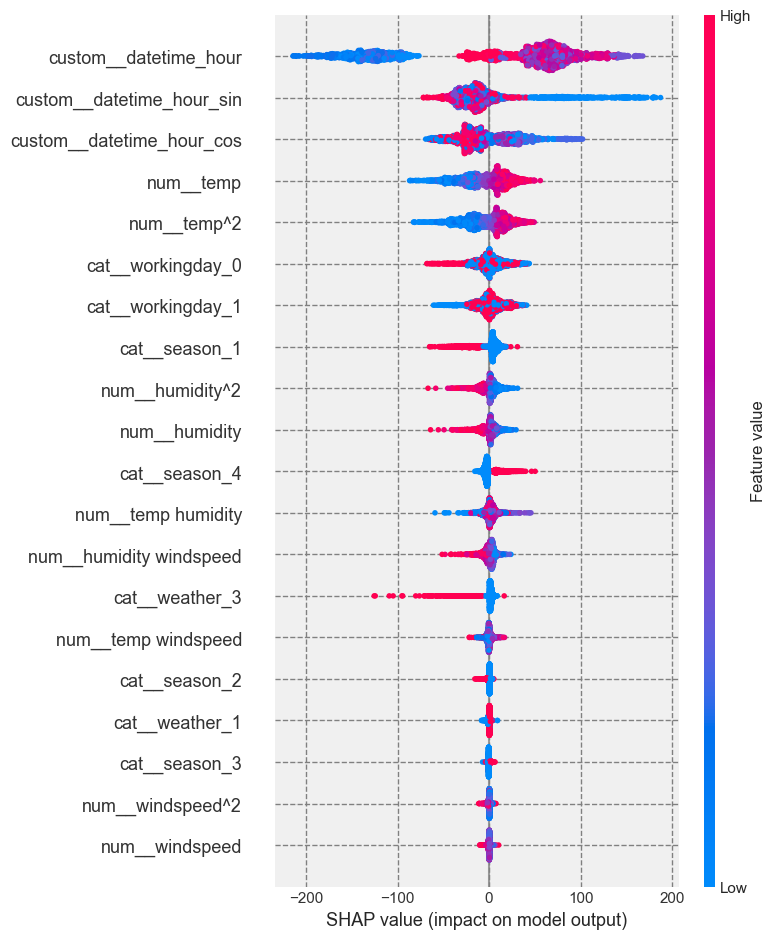

In [478]:
for model in shap_values_dict.keys():
    shap_values = shap_values_dict[model_name] 
    shap.summary_plot(shap_values, X_test_fe)
   


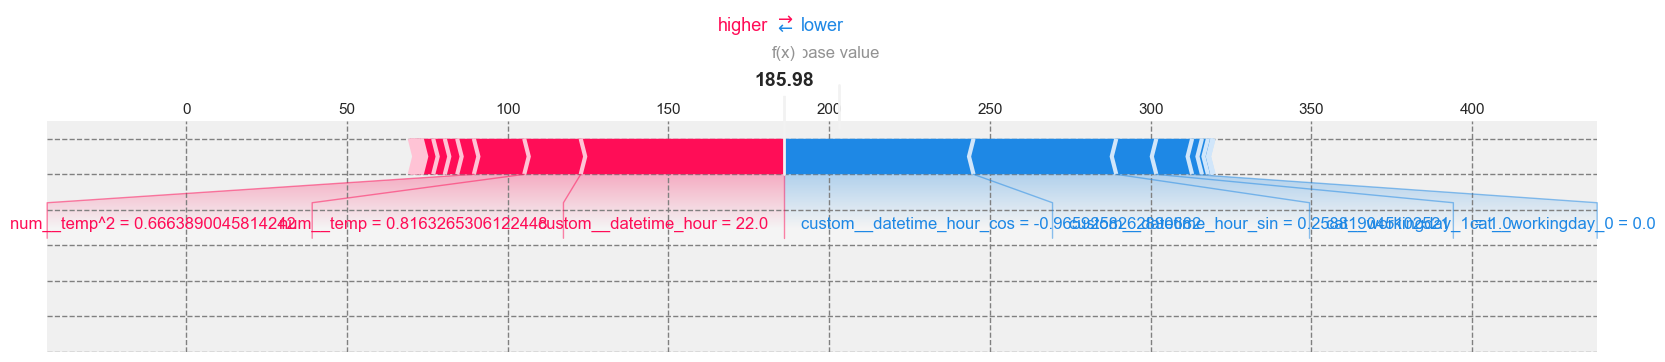

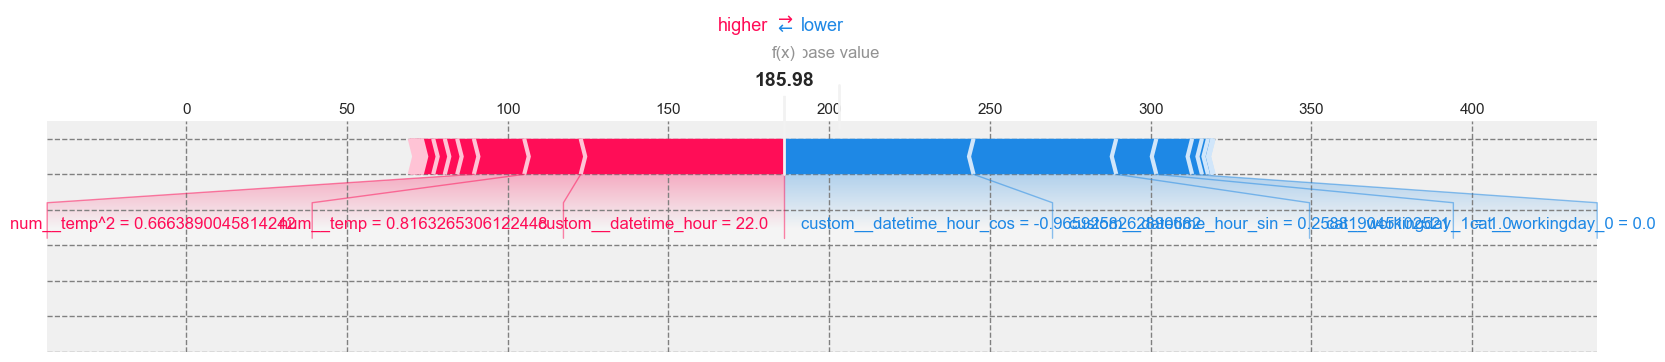

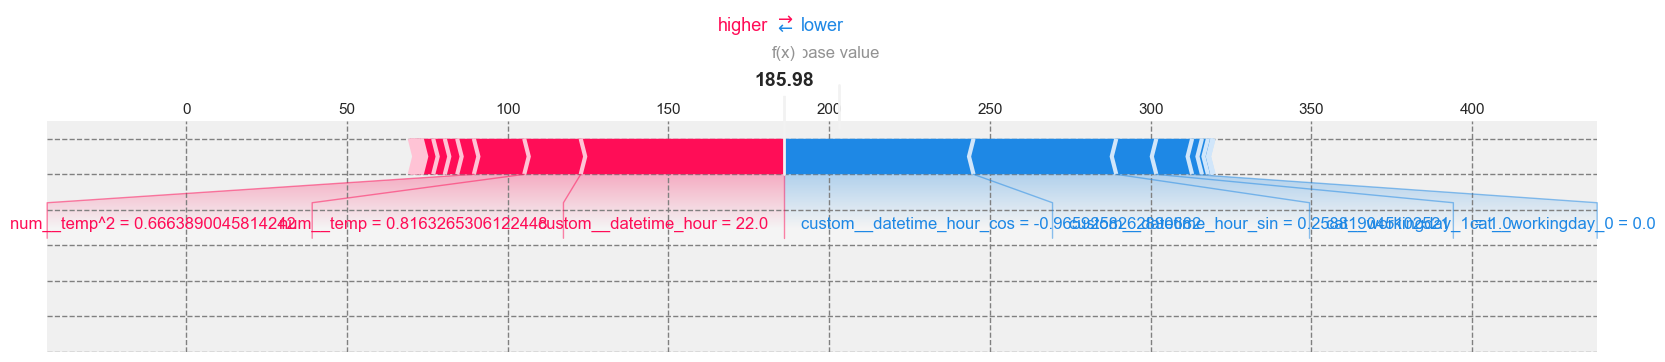

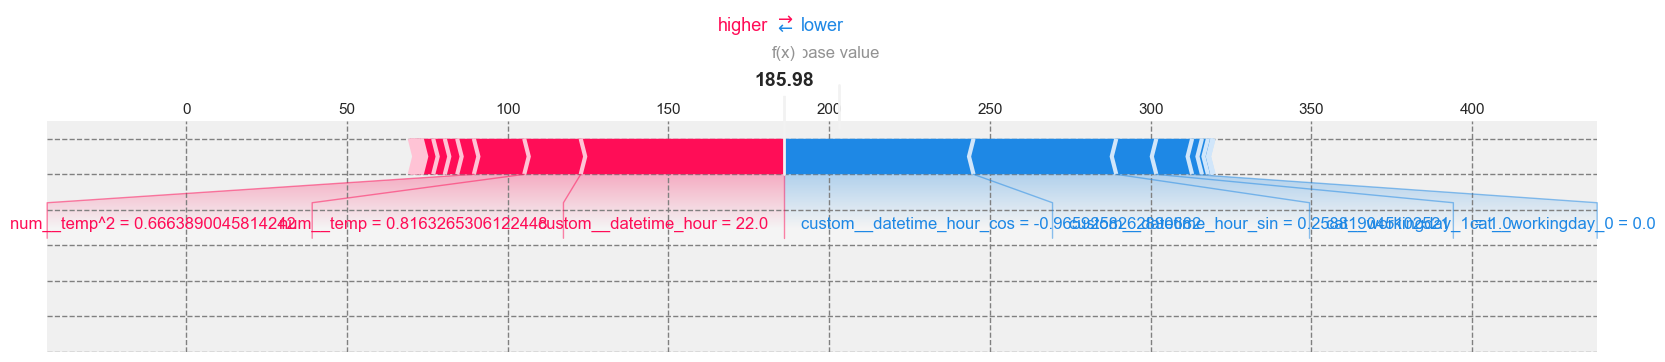

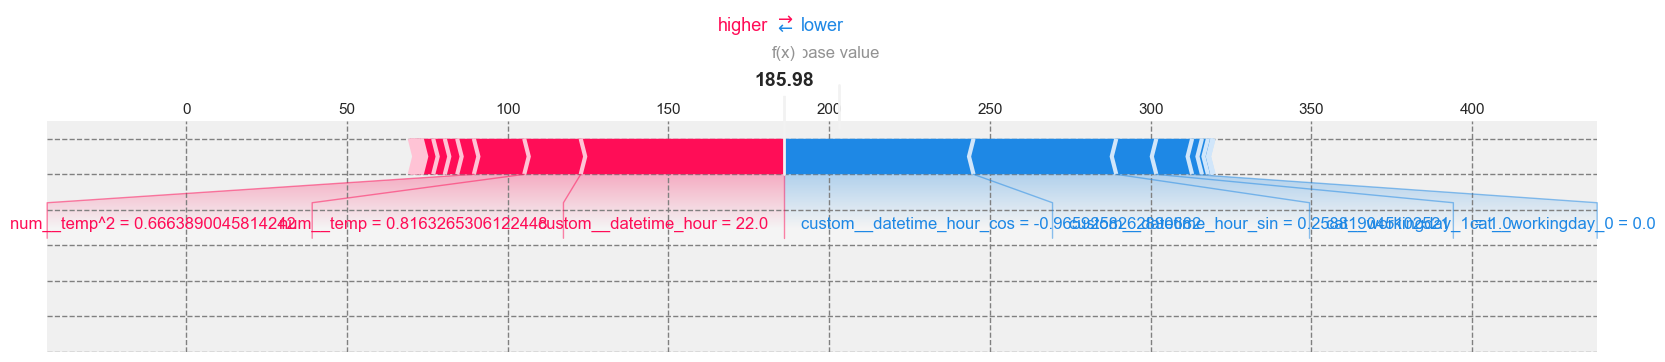

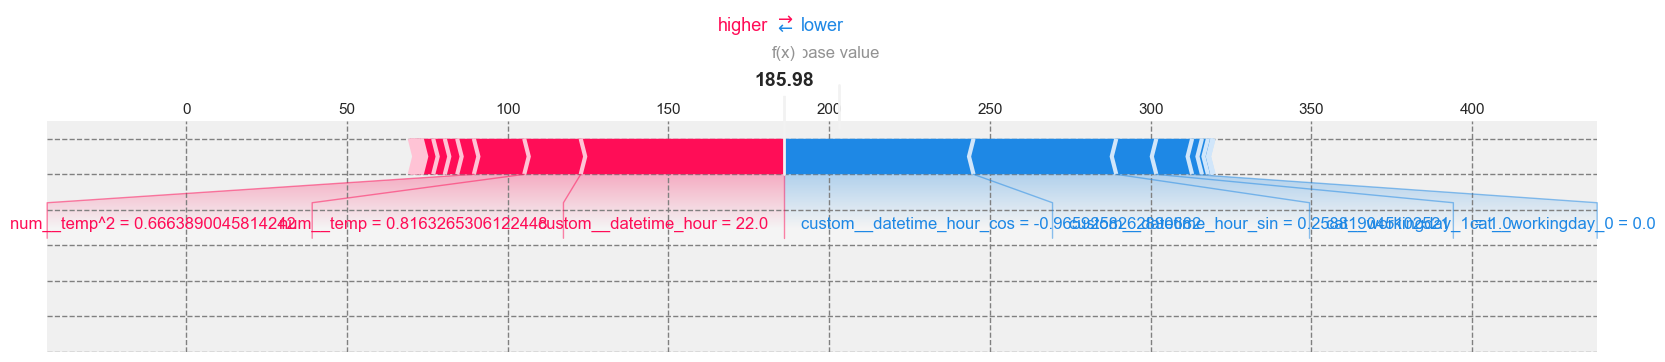

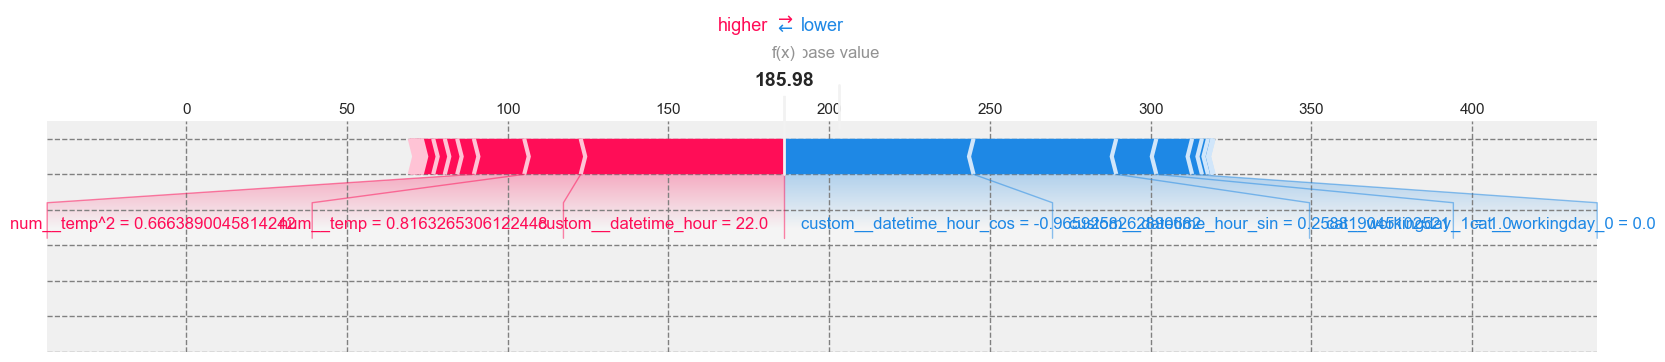

In [487]:
for model in shap_values_dict.keys():
    shap_values = shap_values_dict[model_name] 
    shap.plots.force(explainer.expected_value, shap_values[0], X_test_fe.iloc[0, :], matplotlib = True)
    